**TFM - JULIA DE SALAS DEL RÍO**

El objetivo del presente proyecto es entrenar un modelo predictivo de riesgo de desarrollar diabetes mellitus 2 según las características demográficas, genéticas y conductuales de un usuario.

En primer lugar, instalamos las librerías básicas que necesitaremos a lo largo del proceso.

In [ ]:
import numpy as np
import pandas as pd

## visualización
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

## pre procesado
!pip install ydata-profiling
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

## modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## métricas
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.metrics import classification_report

## mejora de modelos
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

## automatización
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# CARGA DE LOS DATOS

Conectamos nuestra carpeta de Google Drive para acceder a los datos descargados de Kaggle.
Dirección para descarga del dataset: https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("CARGA DEL DATASET PRINCIPAL: diabetes_dataset.csv")

file_path = "/content/drive/MyDrive/Colab Notebooks/Data Diabetes/diabetes_dataset.csv"
df_raw = pd.read_csv(file_path)

df = df_raw.copy()
print(f"Dataset cargado correctamente.")
print(f"Dimensiones originales: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"Memoria usada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

CARGA DEL DATASET PRINCIPAL: diabetes_dataset.csv
Dataset cargado correctamente.
Dimensiones originales: 100000 filas x 31 columnas
Memoria usada: 55.81 MB


Exploración inicial y calidad de los datos

In [ ]:
print("INSPECCIÓN INICIAL DEL DATAFRAME")


print("\n Primeras 5 filas:")
display(df.head())

print("\n Últimas 5 filas:")
display(df.tail())

print("\n Información de las variables:")
df.info()

INSPECCIÓN INICIAL DEL DATAFRAME

 Primeras 5 filas:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1



 Últimas 5 filas:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0
99999,52,Female,White,Postgraduate,Middle,Employed,Never,1,248,2.7,...,31,183,87,91,142,15.93,5.73,27.9,Pre-Diabetes,0



 Información de las variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64


In [ ]:
print("Valores únicos:")
for columna in df.columns:
    unicos = df[columna].unique()
    print(f"{columna}: {len(unicos)} valores únicos")

print("\n Valores correspondientes a los valores únicos")
for columna in df.columns:
    unicos = df[columna].unique()
    print(f"\n{columna} ({len(unicos)} valores únicos):")
    print(unicos[:11])  # Primeros 11 valores
    if len(unicos) > 11:
        print(f"... y {len(unicos) - 11} más")

Valores únicos:
age: 73 valores únicos
gender: 3 valores únicos
ethnicity: 5 valores únicos
education_level: 4 valores únicos
income_level: 5 valores únicos
employment_status: 4 valores únicos
smoking_status: 3 valores únicos
alcohol_consumption_per_week: 11 valores únicos
physical_activity_minutes_per_week: 620 valores únicos
diet_score: 101 valores únicos
sleep_hours_per_day: 71 valores únicos
screen_time_hours_per_day: 156 valores únicos
family_history_diabetes: 2 valores únicos
hypertension_history: 2 valores únicos
cardiovascular_history: 2 valores únicos
bmi: 240 valores únicos
waist_to_hip_ratio: 40 valores únicos
systolic_bp: 86 valores únicos
diastolic_bp: 60 valores únicos
heart_rate: 64 valores únicos
cholesterol_total: 210 valores únicos
hdl_cholesterol: 79 valores únicos
ldl_cholesterol: 190 valores únicos
triglycerides: 262 valores únicos
glucose_fasting: 109 valores únicos
glucose_postprandial: 210 valores únicos
insulin_level: 2350 valores únicos
hba1c: 548 valores únic

In [ ]:
print("\n Nulos:")
df.isnull().sum()


 Nulos:


,0
age,0
gender,0
ethnicity,0
education_level,0
income_level,0
employment_status,0
smoking_status,0
alcohol_consumption_per_week,0
physical_activity_minutes_per_week,0
diet_score,0


No observamos la existencia de valores nulos en el conjunto de datos. Sabemos que, en caso de existir, podríamos tratar este problema con las técnicas aprendidas, imputando estos valores por otros más representativos, como la media, la mediana o la moda, según el caso. Si se tratase de una variable con demasiados nulos, deberíamos estudiar eliminar esta variable, crear una categoría, etc.

ANÁLISIS DESCRIPTIVO

In [ ]:
print("Estadísticas descriptivas (variables numéricas):")
display(df.describe().T) #lo transponemos para facilitar la lectura de la tabla

Estadísticas descriptivas (variables numéricas):


,count,mean,std,min,25%,50%,75%,max
age,100000.0,50.120410,15.604600,18.00,39.00,50.00,61.00,90.00
alcohol_consumption_per_week,100000.0,2.003670,1.417779,0.00,1.00,2.00,3.00,10.00
physical_activity_minutes_per_week,100000.0,118.911640,84.409662,0.00,57.00,100.00,160.00,833.00
diet_score,100000.0,5.994787,1.780954,0.00,4.80,6.00,7.20,10.00
sleep_hours_per_day,100000.0,6.997818,1.094622,3.00,6.30,7.00,7.70,10.00
screen_time_hours_per_day,100000.0,5.996468,2.468406,0.50,4.30,6.00,7.70,16.80
family_history_diabetes,100000.0,0.219410,0.413849,0.00,0.00,0.00,0.00,1.00
hypertension_history,100000.0,0.250800,0.433476,0.00,0.00,0.00,1.00,1.00
cardiovascular_history,100000.0,0.079200,0.270052,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,25.612653,3.586705,15.00,23.20,25.60,28.00,39.20


El conjunto de datos analizado contiene 100.000 registros sin valores nulos, lo que garantiza una base sólida para el análisis estadístico y la modelización posterior.

La edad media de la población es de 50 años, con un rango amplio (18–90 años), lo que permite capturar distintos perfiles de riesgo a lo largo del ciclo vital. El BMI medio se sitúa en 25,6, indicando una población mayoritariamente en rango de sobrepeso, coherente con contextos de riesgo metabólico elevado.

En cuanto a los hábitos de vida, la actividad física semanal media es de 119 minutos, situándose por debajo de las recomendaciones de la OMS, lo que sugiere una prevalencia significativa de sedentarismo. El diet score medio se sitúa en torno a 6 sobre 10, reflejando hábitos dietéticos moderados pero mejorables. Las horas de sueño presentan una media cercana a 7 horas diarias, mientras que el tiempo de pantalla ronda las 6 horas, valores compatibles con patrones de estilo de vida urbanos.

Respecto a los factores clínicos, se observa una media de glucosa basal de 111 mg/dL y una HbA1c media de 6,52%, valores próximos o superiores a los umbrales clínicos de prediabetes, lo que refuerza la idoneidad del dataset para el estudio del riesgo diabético. Asimismo, variables como presión arterial, perfil lipídico y ratio cintura-cadera muestran distribuciones coherentes con una población con riesgo cardiometabólico moderado.

En conjunto, las estadísticas descriptivas evidencian una población heterogénea, con una combinación de factores modificables y no modificables que justifican el uso de técnicas de machine learning para la predicción del diagnóstico de diabetes.



In [ ]:
print("Análisis de filas duplicadas:")
duplicados = df.duplicated().sum()
print(f"· Filas duplicadas completas: {duplicados}")
if duplicados > 0:
    print(f"· Porcentaje de duplicados: {(duplicados/len(df))*100:.2f}%")

Análisis de filas duplicadas:
· Filas duplicadas completas: 0


# ANÁLISIS DE LA VARIABLE OBJETIVO

Convertimos la variable objetivo para facilitar el análisis.

In [ ]:
df['y'] = df['diagnosed_diabetes']
df = df.drop('diagnosed_diabetes', axis=1)

In [ ]:
print("Análisis del desbalanceo de clases:")
df.y.value_counts()

Análisis del desbalanceo de clases:


,count
y,
1,59998
0,40002


Proporción de clases:


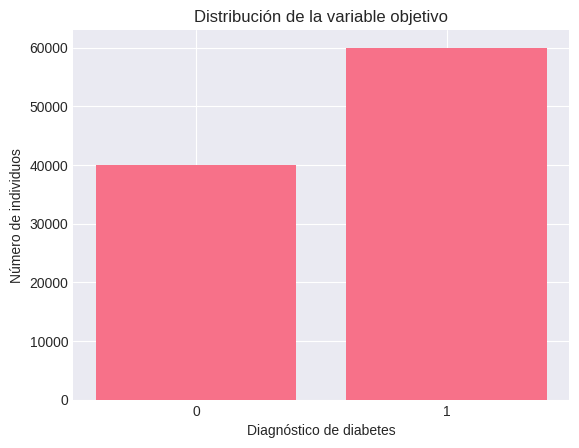

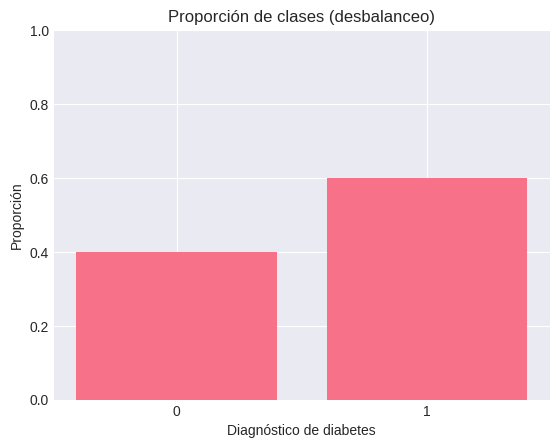

In [ ]:
print("Proporción de clases:")

class_counts = df['y'].value_counts().sort_index()

plt.figure()
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.xlabel('Diagnóstico de diabetes')
plt.ylabel('Número de individuos')
plt.title('Distribución de la variable objetivo')
plt.show()

class_props = df['y'].value_counts(normalize=True).sort_index()

plt.figure()
plt.bar(class_props.index.astype(str), class_props.values)
plt.xlabel('Diagnóstico de diabetes')
plt.ylabel('Proporción')
plt.title('Proporción de clases (desbalanceo)')
plt.ylim(0,1)
plt.show()

In [ ]:
print("Análisis del tipo de datos:")
df.dtypes

Análisis del tipo de datos:


,0
age,int64
gender,object
ethnicity,object
education_level,object
income_level,object
employment_status,object
smoking_status,object
alcohol_consumption_per_week,int64
physical_activity_minutes_per_week,int64
diet_score,float64


In [ ]:
df_diabetes = df[['diabetes_stage', 'y']]

# Primeras filas
print(df_diabetes.head())

# Conteo de valores en cada columna
print("\nDistribución de diabetes_stage:")
print(df_diabetes['diabetes_stage'].value_counts())

print("\nDistribución de diagnosed_diabetes:")
print(df_diabetes['y'].value_counts())

stage_counts = df['diabetes_stage'].value_counts()
print("Distribución de diabetes_stage:")
print(stage_counts)

# Con porcentajes
stage_percentages = df['y'].value_counts(normalize=True) * 100
print("\nDistribución porcentual:")
print(stage_percentages.round(2))

  diabetes_stage  y
0         Type 2  1
1    No Diabetes  0
2         Type 2  1
3         Type 2  1
4         Type 2  1

Distribución de diabetes_stage:
diabetes_stage
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Gestational       278
Type 1            122
Name: count, dtype: int64

Distribución de diagnosed_diabetes:
y
1    59998
0    40002
Name: count, dtype: int64
Distribución de diabetes_stage:
diabetes_stage
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Gestational       278
Type 1            122
Name: count, dtype: int64

Distribución porcentual:
y
1    60.0
0    40.0
Name: proportion, dtype: float64


In [ ]:
tabla = pd.crosstab(df['diabetes_stage'], df['y'])
print(tabla)

y                   0      1
diabetes_stage              
Gestational       120    158
No Diabetes      7981      0
Pre-Diabetes    31845      0
Type 1             56     66
Type 2              0  59774


# Clasificación y agrupación de variables.

In [ ]:
lista_numericas=['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
                 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
                 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c',
                 'diabetes_risk_score']

In [ ]:
lista_categoricas=['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']

In [ ]:
categoricas_binarias = ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']

Vemos la correlación con la varible objetivo

In [ ]:
# Copiamos solo columnas numéricas
df_num = df.select_dtypes(include=['int32','int64','float64']).copy()

# Codificamos la variable target
df_num['y'] = LabelEncoder().fit_transform(df['y'])

# Calculamos correlación absoluta
corr = df_num.corr().abs()

# Ordenamos por correlación con la variable target
corr_target = corr[['y']].sort_values(by='y', ascending=False)
print(corr_target)

                                           y
y                                   1.000000
hba1c                               0.679397
glucose_postprandial                0.629832
glucose_fasting                     0.510919
diabetes_risk_score                 0.277300
family_history_diabetes             0.197926
age                                 0.137713
physical_activity_minutes_per_week  0.100774
bmi                                 0.097057
systolic_bp                         0.095481
waist_to_hip_ratio                  0.078918
ldl_cholesterol                     0.067475
cholesterol_total                   0.058173
insulin_level                       0.057715
triglycerides                       0.056230
hdl_cholesterol                     0.051227
diet_score                          0.044298
diastolic_bp                        0.035619
cardiovascular_history              0.029793
hypertension_history                0.027524
heart_rate                          0.022785
screen_tim

In [ ]:
print(f"Correlación de variable:")
display(corr_target.style.format({'Correlación': '{:.3f}', 'Abs_Corr': '{:.3f}'}))

Correlación de variable:


,y
y,1.000000
hba1c,0.679397
glucose_postprandial,0.629832
glucose_fasting,0.510919
diabetes_risk_score,0.277300
family_history_diabetes,0.197926
age,0.137713
physical_activity_minutes_per_week,0.100774
bmi,0.097057
systolic_bp,0.095481


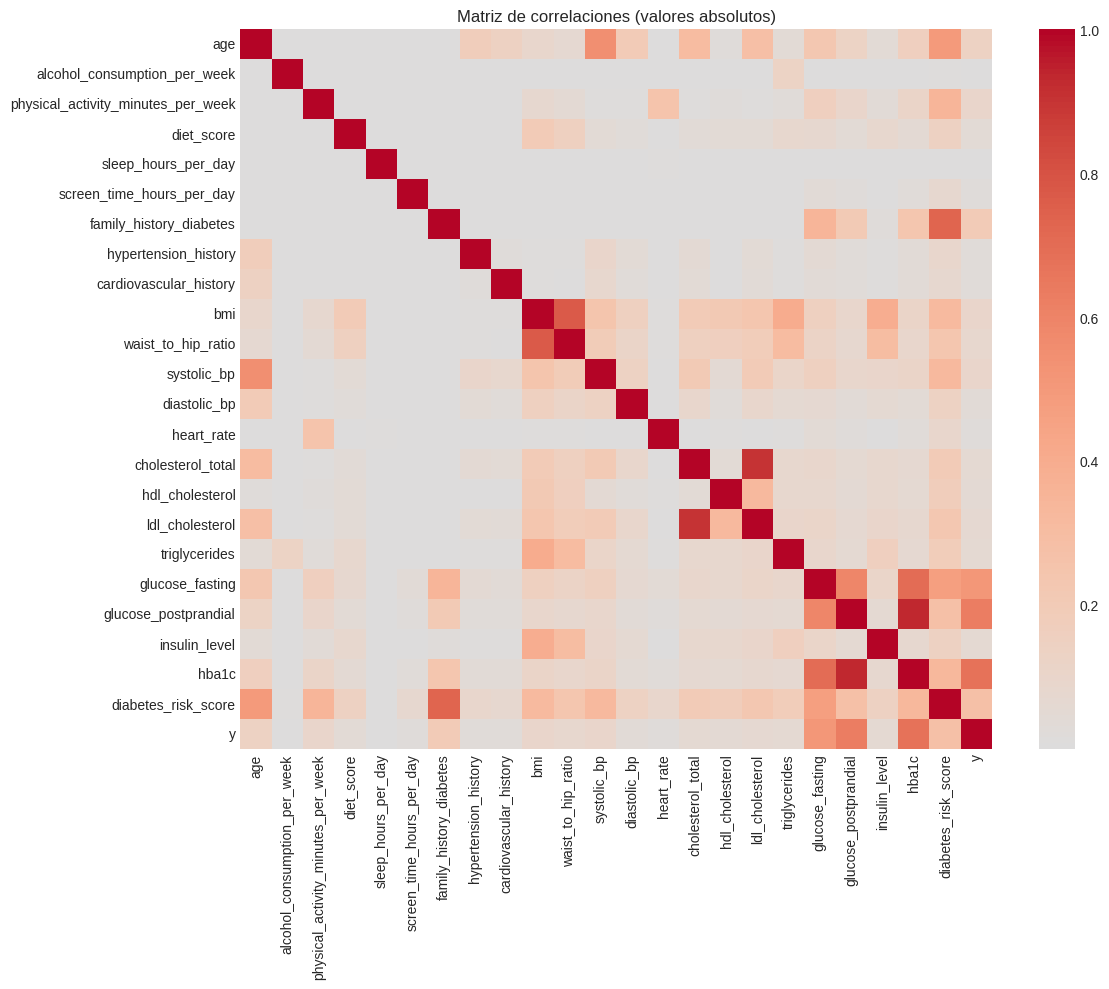

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    cbar=True
)

plt.title('Matriz de correlaciones (valores absolutos)')
plt.tight_layout()
plt.show()

Las variables con valores de correlación absoluta más elevados presentan una mayor relación lineal con la variable objetivo, lo que las convierte en candidatas relevantes para fases posteriores del proceso de modelización. No obstante, es importante destacar que la correlación lineal no implica causalidad, ni garantiza un mayor poder predictivo en modelos no lineales, por lo que este análisis se utiliza como una herramienta exploratoria y de apoyo a la selección inicial de variables.

La matriz muestra correlaciones fuertes y esperables entre variables metabólicas estrechamente relacionadas (glucosa en ayunas/postprandial, HbA1c, insulina y diabetes_risk_score), lo que indica posible redundancia de información. En cambio, las variables de estilo de vida presentan correlaciones bajas con el resto, aportando señales más independientes. Esto sugiere riesgo de multicolinealidad en el bloque clínico y la conveniencia de selección o regularización de variables para evitar sobreajuste.

# Distribuciones básicas

Variables demográficas:


 Histograma de Edad


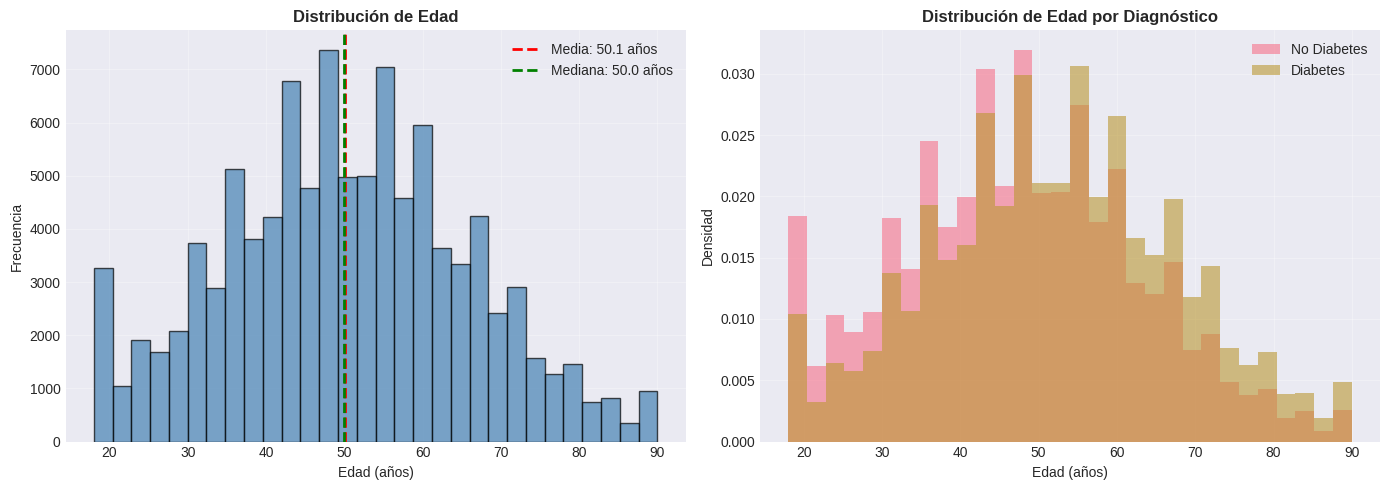

   · Edad promedio: 50.1 ± 15.6 años
   · Rango: 18 - 90 años
   · Edad media con diabetes: 51.9 años
   · Edad media sin diabetes: 47.5 años


In [ ]:
# Histograma de Edad
print("\n Histograma de Edad")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma simple
axes[0].hist(df['age'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Edad (años)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Edad', fontweight='bold')
axes[0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {df["age"].mean():.1f} años')
axes[0].axvline(df['age'].median(), color='green', linestyle='--', linewidth=2,
                label=f'Mediana: {df["age"].median():.1f} años')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histograma por diagnóstico
for diagnosis in [0, 1]:
    subset = df[df['y'] == diagnosis]
    label = 'No Diabetes' if diagnosis == 0 else 'Diabetes'
    axes[1].hist(subset['age'], bins=30, alpha=0.6, label=label, density=True)

axes[1].set_xlabel('Edad (años)')
axes[1].set_ylabel('Densidad')
axes[1].set_title('Distribución de Edad por Diagnóstico', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
print(f"   · Edad promedio: {df['age'].mean():.1f} ± {df['age'].std():.1f} años")
print(f"   · Rango: {df_raw['age'].min()} - {df['age'].max()} años")
print(f"   · Edad media con diabetes: {df[df['y']==1]['age'].mean():.1f} años")
print(f"   · Edad media sin diabetes: {df[df['y']==0]['age'].mean():.1f} años")



La edad se distribuye de forma aproximadamente simétrica en torno a los 50 años, concentrándose principalmente entre los 40 y 60 años.

Los casos de diabetes tienden a concentrarse ligeramente en edades más avanzadas en comparación con el grupo sin diabetes. Aunque existe solapamiento entre ambos grupos, la densidad relativa en edades superiores es mayor en la población diagnosticada, lo que sugiere una posible asociación entre mayor edad y presencia de diabetes.


 Histograma de BMI


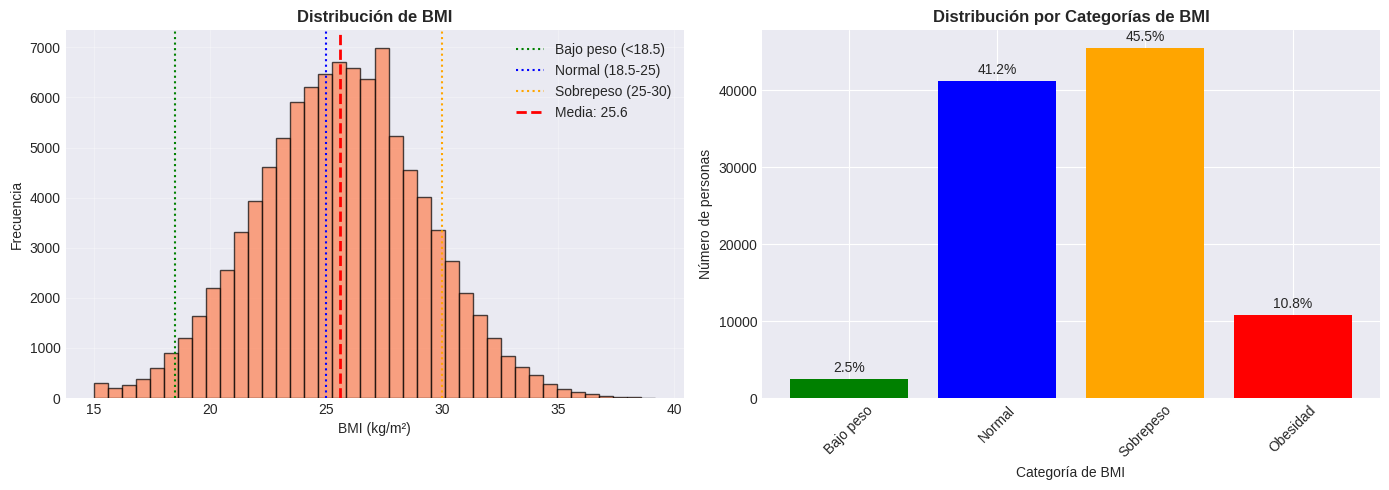

   · BMI promedio: 25.6 ± 3.6
   · % Sobrepeso/Obesidad (BMI ≥25): 57.4%

 Boxplot de BMI por Diagnóstico


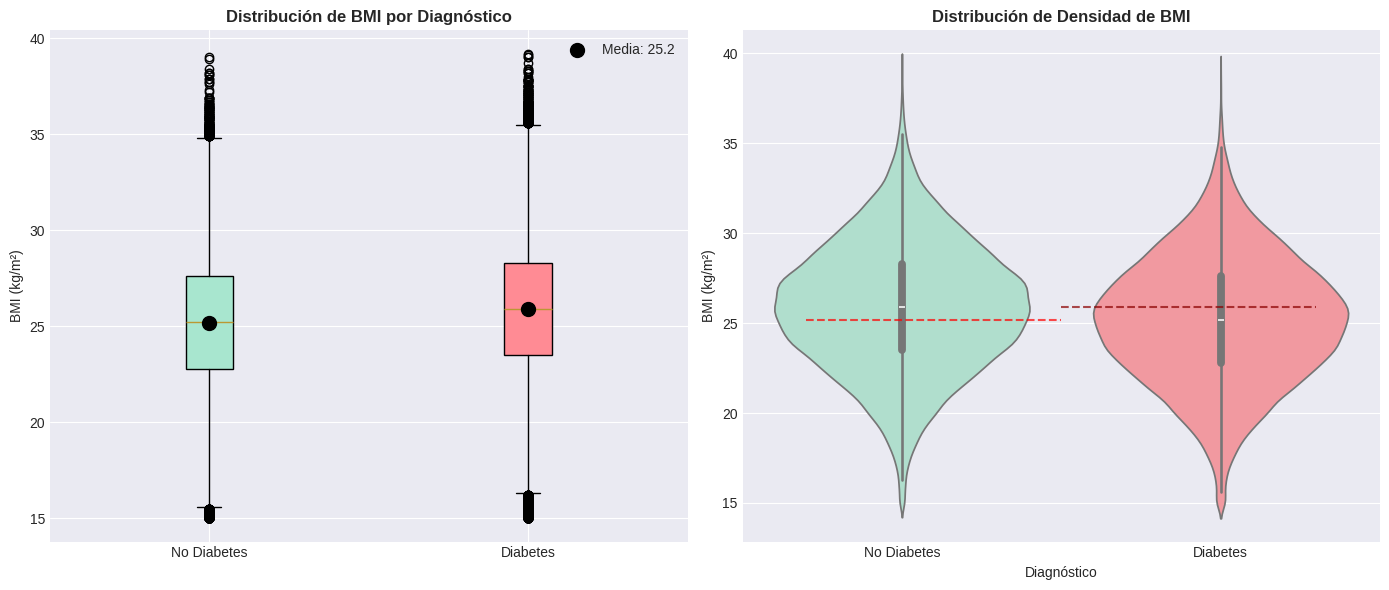

   · BMI con diabetes: 25.90 ± 3.58
   · BMI sin diabetes: 25.19 ± 3.56
   · Diferencia: 0.71 (p=0.0000)


In [ ]:
from scipy import stats
# Histograma de BMI
print("\n Histograma de BMI")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de BMI
axes[0].hist(df['bmi'], bins=40, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('BMI (kg/m²)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de BMI', fontweight='bold')

# Líneas de referencia BMI
axes[0].axvline(18.5, color='green', linestyle=':', linewidth=1.5, label='Bajo peso (<18.5)')
axes[0].axvline(25, color='blue', linestyle=':', linewidth=1.5, label='Normal (18.5-25)')
axes[0].axvline(30, color='orange', linestyle=':', linewidth=1.5, label='Sobrepeso (25-30)')
axes[0].axvline(df['bmi'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {df["bmi"].mean():.1f}')
axes[0].legend(loc='upper right')
axes[0].grid(alpha=0.3)

# Categorías de BMI
bmi_categories = pd.cut(df['bmi'],
                        bins=[0, 18.5, 25, 30, 40],
                        labels=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad'])
category_counts = bmi_categories.value_counts().sort_index()

bars = axes[1].bar(category_counts.index, category_counts.values, color=['green', 'blue', 'orange', 'red'])
axes[1].set_xlabel('Categoría de BMI')
axes[1].set_ylabel('Número de personas')
axes[1].set_title('Distribución por Categorías de BMI', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

# Porcentajes
for bar, count in zip(bars, category_counts.values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 500,
                f'{count/len(df)*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"   · BMI promedio: {df['bmi'].mean():.1f} ± {df['bmi'].std():.1f}")
print(f"   · % Sobrepeso/Obesidad (BMI ≥25): {(df['bmi'] >= 25).mean()*100:.1f}%")
# Boxplot de BMI por diagnóstico
print("\n Boxplot de BMI por Diagnóstico")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot simple
box_data = [df[df['y']==0]['bmi'],
            df[df['y']==1]['bmi']]
bp = axes[0].boxplot(box_data, labels=['No Diabetes', 'Diabetes'], patch_artist=True)
axes[0].set_ylabel('BMI (kg/m²)')
axes[0].set_title('Distribución de BMI por Diagnóstico', fontweight='bold')

# Coloreamos las cajas
colors = ['#A8E6CF', '#FF8B94']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Añadimos puntos de media
for i, data in enumerate(box_data, 1):
    axes[0].scatter(i, data.mean(), color='black', s=100, zorder=3,
                   label=f'Media: {data.mean():.1f}' if i==1 else '')
axes[0].legend()

# Violin plot (más informativa)
df_temp = df.copy()
df_temp['diagnosed_diabetes_str'] = df_temp['y'].astype(str)

sns.violinplot(x='diagnosed_diabetes_str', y='bmi', data=df_temp, ax=axes[1],
               palette={'0': '#FF8B94', '1': '#A8E6CF'})
axes[1].set_xlabel('Diagnóstico')
axes[1].set_ylabel('BMI (kg/m²)')
axes[1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[1].set_title('Distribución de Densidad de BMI', fontweight='bold')

# Añadimos la media
for i in [0, 1]:
    mean_bmi = df[df['y']==i]['bmi'].mean()
    axes[1].axhline(mean_bmi, color='red' if i==0 else 'darkred',
                   linestyle='--', alpha=0.7, xmin=0.1+i*0.4, xmax=0.5+i*0.4)

plt.tight_layout()
plt.show()

# Test estadístico
bmi_diabetes = df[df['y']==1]['bmi']
bmi_no_diabetes = df[df['y']==0]['bmi']
t_stat, p_value = stats.ttest_ind(bmi_diabetes, bmi_no_diabetes)
print(f"   · BMI con diabetes: {bmi_diabetes.mean():.2f} ± {bmi_diabetes.std():.2f}")
print(f"   · BMI sin diabetes: {bmi_no_diabetes.mean():.2f} ± {bmi_no_diabetes.std():.2f}")
print(f"   · Diferencia: {bmi_diabetes.mean() - bmi_no_diabetes.mean():.2f} (p={p_value:.4f})")


El BMI medio es significativamente mayor en el grupo con diagnóstico de diabetes. No obstante, la diferencia absoluta es moderada, lo que sugiere que el BMI actúa como un factor de riesgo relevante pero no suficiente por sí solo, reforzando la necesidad de modelos multivariantes.

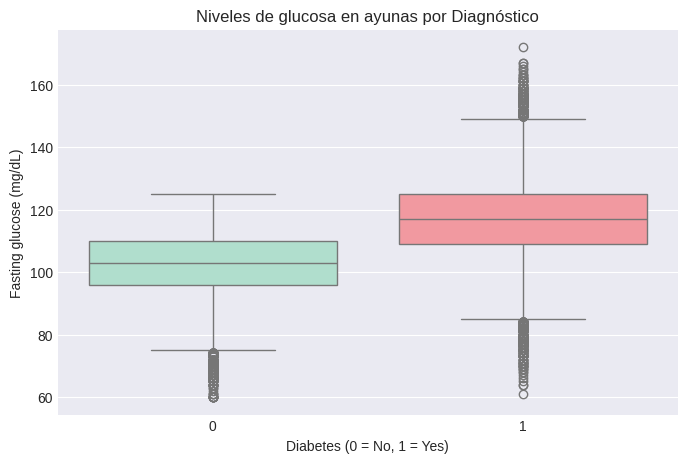

In [ ]:
# Glucosa en ayunas

plt.figure(figsize=(8, 5))
sns.boxplot(
    x="y",
    y="glucose_fasting",
    data=df,
    palette=["#A8E6CF", "#FF8B94"]
)

plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Fasting glucose (mg/dL)")
plt.title("Niveles de glucosa en ayunas por Diagnóstico")

plt.show()

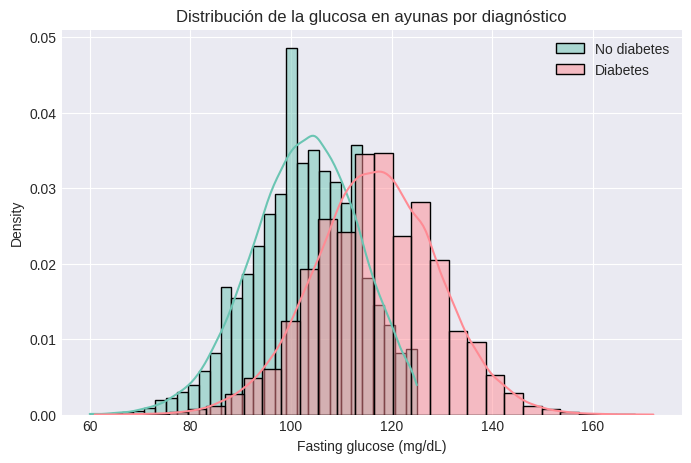

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(
    df[df["y"] == 0]["glucose_fasting"],
    bins=30,
    color="#6BC5B3",
    label="No diabetes",
    kde=True,
    stat="density"
)

sns.histplot(
    df[df["y"] == 1]["glucose_fasting"],
    bins=30,
    color="#FF8B94",
    label="Diabetes",
    kde=True,
    stat="density"
)

plt.xlabel("Fasting glucose (mg/dL)")
plt.ylabel("Density")
plt.title("Distribución de la glucosa en ayunas por diagnóstico")
plt.legend()

plt.show()

La distribución de la glucosa en ayunas muestra una clara separación entre individuos con y sin diabetes. El grupo sin diagnóstico presenta una mayor densidad en valores cercanos a la normalidad (alrededor de 90–100 mg/dL), mientras que en el grupo diagnosticado la distribución se desplaza hacia valores más elevados, concentrándose en rangos superiores a 110 mg/dL. Este desplazamiento sugiere una fuerte asociación entre niveles elevados de glucosa en ayunas y la presencia de diabetes.

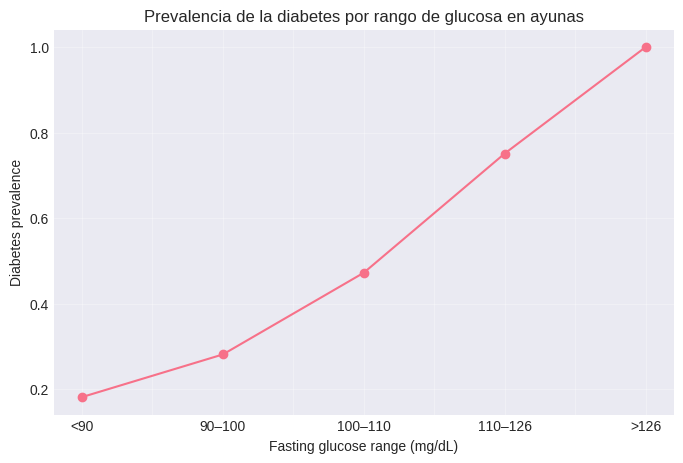

In [ ]:
df["glucose_bin"] = pd.cut(
    df["glucose_fasting"],
    bins=[0, 90, 100, 110, 126, 300],
    labels=["<90", "90–100", "100–110", "110–126", ">126"]
)

risk_by_glucose = df.groupby("glucose_bin")["y"].mean()

plt.figure(figsize=(8, 5))
risk_by_glucose.plot(marker="o")

plt.xlabel("Fasting glucose range (mg/dL)")
plt.ylabel("Diabetes prevalence")
plt.title("Prevalencia de la diabetes por rango de glucosa en ayunas")

plt.grid(True, alpha=0.3)
plt.show()

Se observa un incremento progresivo de la prevalencia de diabetes conforme aumentan los niveles de glucosa en ayunas, lo que refuerza su valor como indicador temprano de riesgo.

Estos resultados justifican la inclusión de variables relacionadas con la glucosa tanto en su forma continua como categorizada, facilitando además la interpretación clínica y la generación de recomendaciones accionables en la aplicación final.

Variables de estilo de vida


 Actividad Física


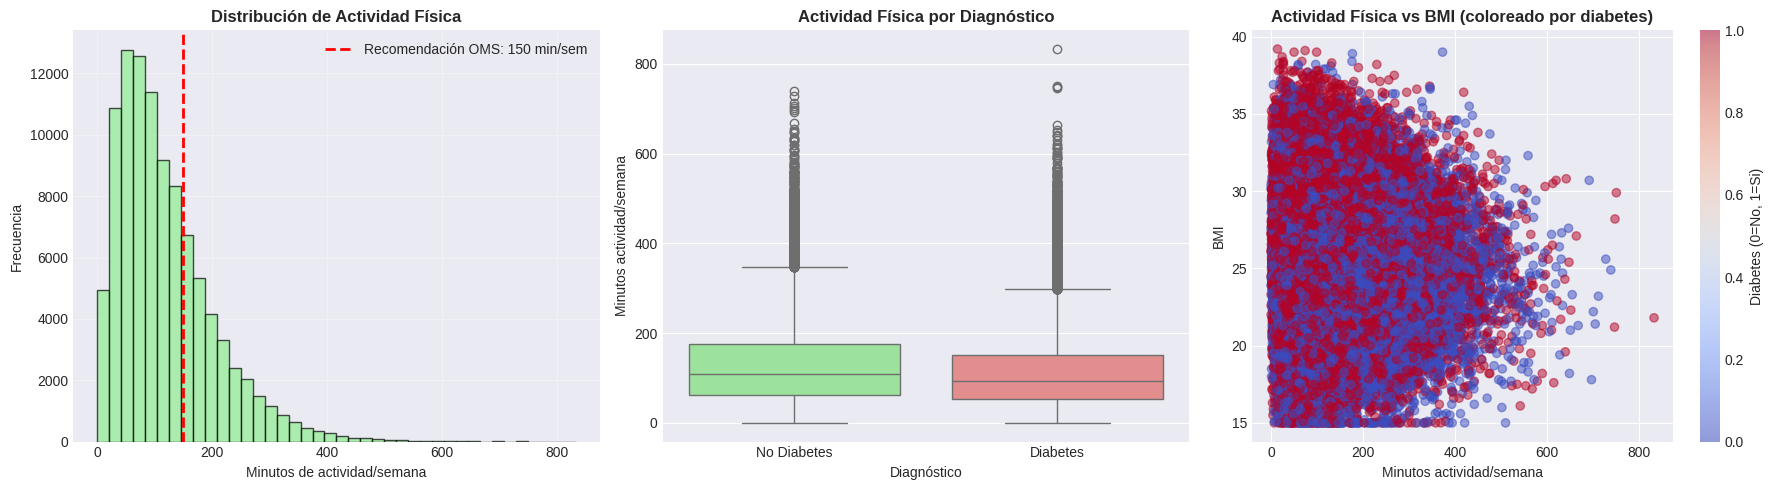

   · Actividad promedio: 119 min/semana
   · % que cumple recomendación OMS (≥150 min): 28.5%


In [ ]:
# Actividad Física
print("\n Actividad Física")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
axes[0].hist(df['physical_activity_minutes_per_week'], bins=40,
            edgecolor='black', alpha=0.7, color='lightgreen')
axes[0].set_xlabel('Minutos de actividad/semana')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Actividad Física', fontweight='bold')
axes[0].axvline(150, color='red', linestyle='--', linewidth=2,
               label='Recomendación OMS: 150 min/sem')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot por diagnóstico
sns.boxplot(x='y', y='physical_activity_minutes_per_week',
           data=df, ax=axes[1], palette=['lightgreen', 'lightcoral'])
axes[1].set_xlabel('Diagnóstico')
axes[1].set_ylabel('Minutos actividad/semana')
axes[1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[1].set_title('Actividad Física por Diagnóstico', fontweight='bold')

# Scatter plot vs BMI
scatter = axes[2].scatter(df['physical_activity_minutes_per_week'],
                         df['bmi'],
                         c=df['y'],
                         alpha=0.5, cmap='coolwarm')
axes[2].set_xlabel('Minutos actividad/semana')
axes[2].set_ylabel('BMI')
axes[2].set_title('Actividad Física vs BMI (coloreado por diabetes)', fontweight='bold')
plt.colorbar(scatter, ax=axes[2], label='Diabetes (0=No, 1=Si)')

plt.tight_layout()
plt.show()

# Estadísticas
print(f"   · Actividad promedio: {df['physical_activity_minutes_per_week'].mean():.0f} min/semana")
print(f"   · % que cumple recomendación OMS (≥150 min): {(df['physical_activity_minutes_per_week'] >= 150).mean()*100:.1f}%")

Las personas diagnosticadas con diabetes presentan, en promedio, menores niveles de actividad física semanal y una mayor concentración en valores bajos de actividad, lo que refuerza el papel del sedentarismo como factor de riesgo metabólico. Aunque existe solapamiento entre grupos, la actividad física muestra capacidad discriminativa a nivel poblacional.


 Diet Score


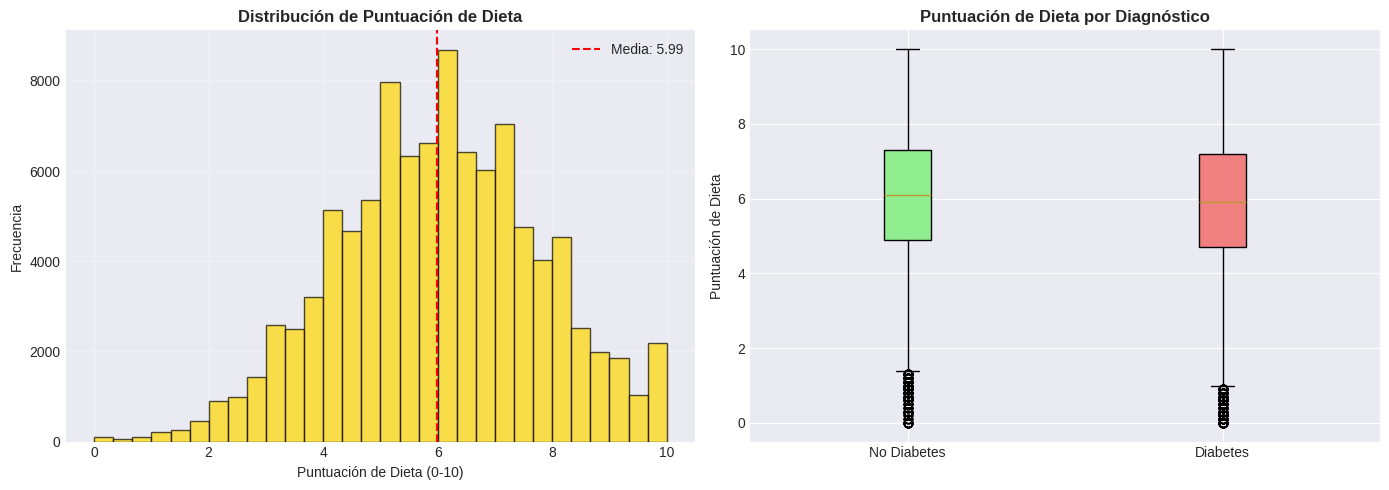

In [ ]:
# Diet Score
print("\n Diet Score")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución
axes[0].hist(df['diet_score'], bins=30, edgecolor='black', alpha=0.7, color='gold')
axes[0].set_xlabel('Puntuación de Dieta (0-10)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Puntuación de Dieta', fontweight='bold')
axes[0].axvline(df['diet_score'].mean(), color='red', linestyle='--',
               label=f'Media: {df_raw["diet_score"].mean():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Por diagnóstico
diet_by_diag = [df[df['y']==0]['diet_score'],
                df[df['y']==1]['diet_score']]
bp = axes[1].boxplot(diet_by_diag, labels=['No Diabetes', 'Diabetes'], patch_artist=True)
axes[1].set_ylabel('Puntuación de Dieta')
axes[1].set_title('Puntuación de Dieta por Diagnóstico', fontweight='bold')

# Colores
for patch, color in zip(bp['boxes'], ['lightgreen', 'lightcoral']):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()

Los individuos que no fueron diagnosticados con diabetes muestran una media un tanto superior en cuanto a la valoración de su dieta.


 Horas de Sueño y Screen Time


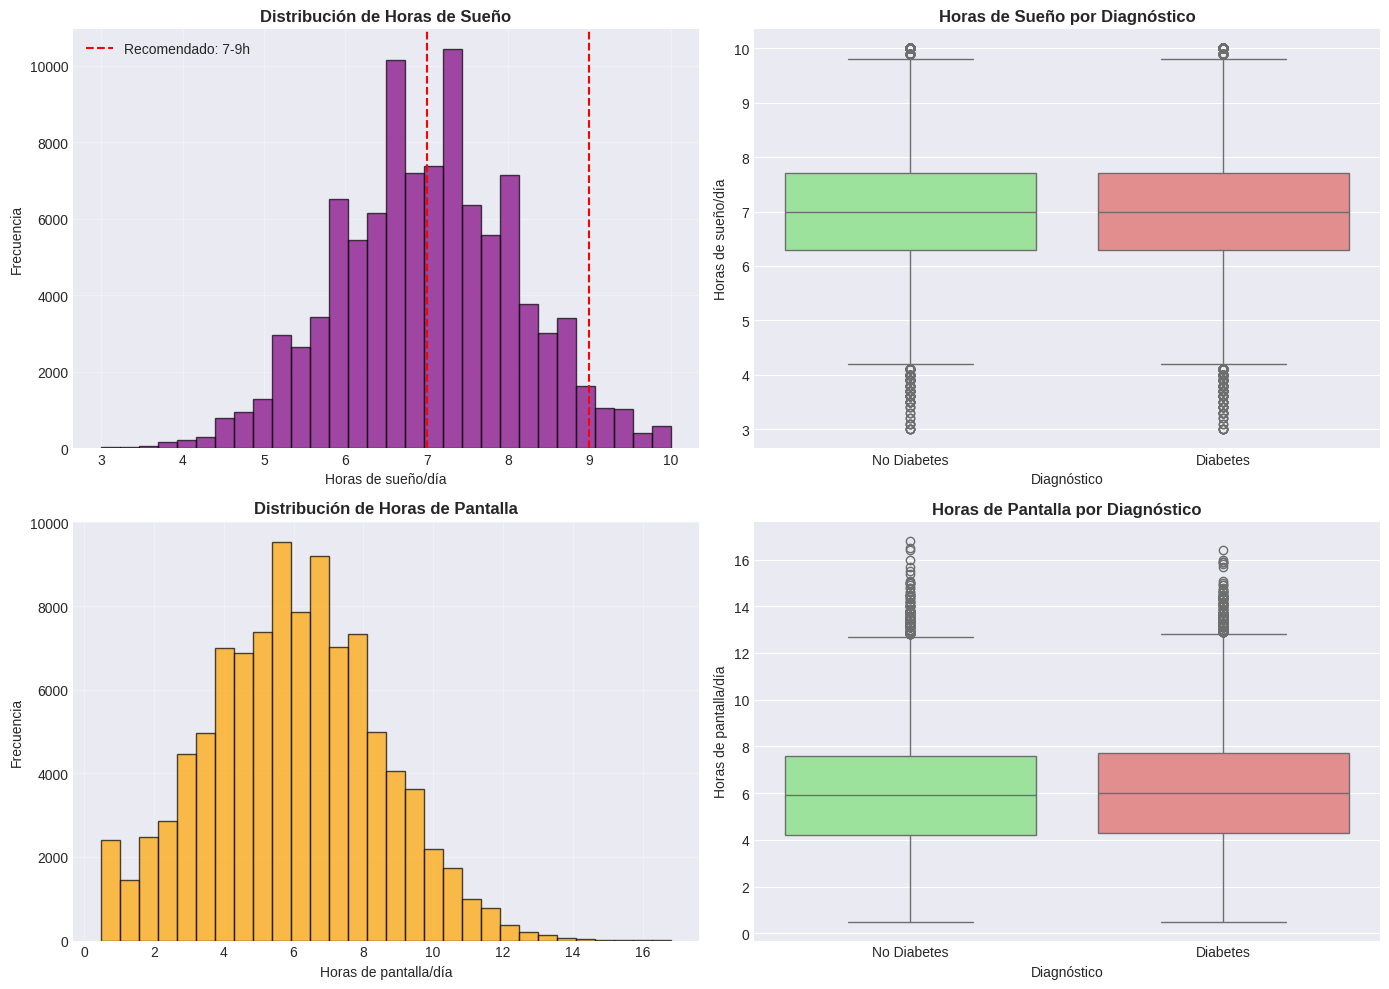

In [ ]:
# Horas de Sueño y Screen Time
print("\n Horas de Sueño y Screen Time")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sueño - Distribución
axes[0,0].hist(df['sleep_hours_per_day'], bins=30, edgecolor='black',
              alpha=0.7, color='purple')
axes[0,0].set_xlabel('Horas de sueño/día')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_title('Distribución de Horas de Sueño', fontweight='bold')
axes[0,0].axvline(7, color='red', linestyle='--', label='Recomendado: 7-9h')
axes[0,0].axvline(9, color='red', linestyle='--')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Sueño vs Diabetes
sns.boxplot(x='y', y='sleep_hours_per_day', data=df,
           ax=axes[0,1], palette=['lightgreen', 'lightcoral'])
axes[0,1].set_xlabel('Diagnóstico')
axes[0,1].set_ylabel('Horas de sueño/día')
axes[0,1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[0,1].set_title('Horas de Sueño por Diagnóstico', fontweight='bold')

# Screen Time - Distribución
axes[1,0].hist(df['screen_time_hours_per_day'], bins=30, edgecolor='black',
              alpha=0.7, color='orange')
axes[1,0].set_xlabel('Horas de pantalla/día')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución de Horas de Pantalla', fontweight='bold')
axes[1,0].grid(alpha=0.3)

# Screen Time vs Diabetes
sns.boxplot(x='y', y='screen_time_hours_per_day', data=df,
           ax=axes[1,1], palette=['lightgreen', 'lightcoral'])
axes[1,1].set_xlabel('Diagnóstico')
axes[1,1].set_ylabel('Horas de pantalla/día')
axes[1,1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[1,1].set_title('Horas de Pantalla por Diagnóstico', fontweight='bold')

plt.tight_layout()
plt.show()

Las horas de sueño y las horas de pantalla se muestran relativamente estables entre ambos grupos, lo cual se alinea con el estilo de vida occidental actual.


 Hábito Tabáquico vs Diabetes


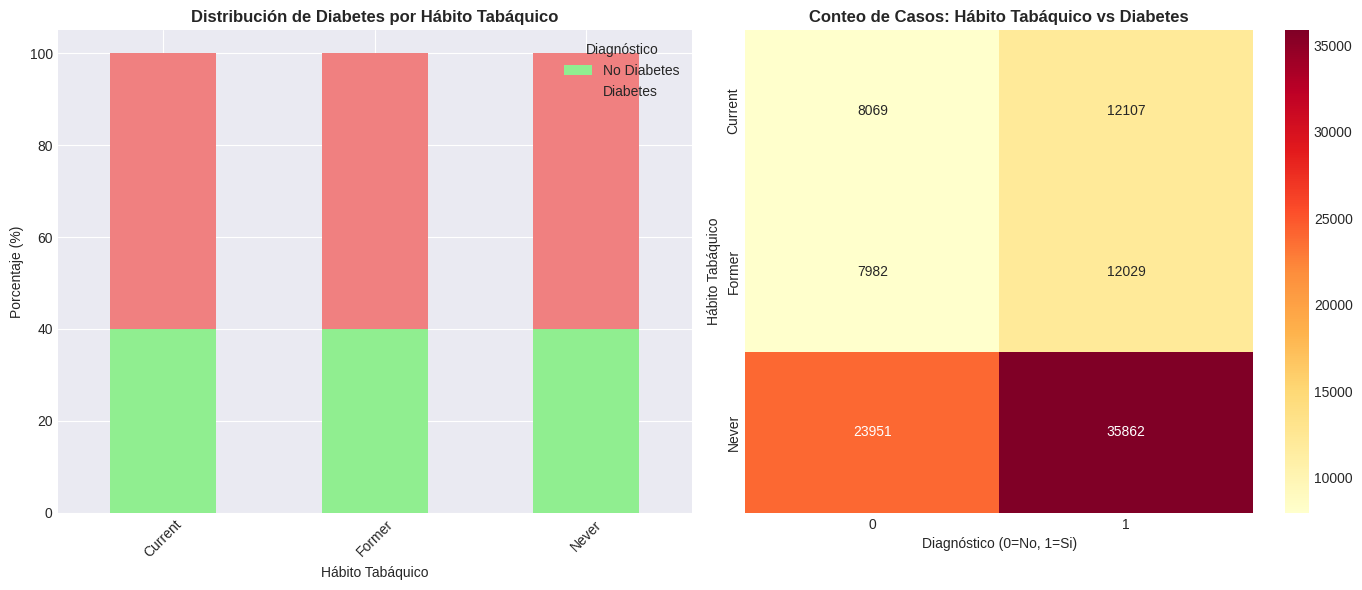

   · Prevalencia de diabetes por hábito tabáquico:
     Never: 60.0% (n=59813)
     Former: 60.1% (n=20011)
     Current: 60.0% (n=20176)


In [ ]:
# Hábito tabáquico vs Diabetes
print("\n Hábito Tabáquico vs Diabetes")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

smoking_col = 'smoking_status'

# Gráfico de barras apiladas
smoking_diabetes = pd.crosstab(df[smoking_col], df['y'])
smoking_diabetes_percent = smoking_diabetes.div(smoking_diabetes.sum(axis=1), axis=0) * 100

smoking_diabetes_percent.plot(kind='bar', stacked=True, ax=axes[0],
                             color=['lightgreen', 'lightcoral'])
axes[0].set_xlabel('Hábito Tabáquico')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].set_title('Distribución de Diabetes por Hábito Tabáquico', fontweight='bold')
axes[0].legend(['No Diabetes', 'Diabetes'], title='Diagnóstico')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de heatmap
smoking_counts = pd.crosstab(df[smoking_col], df['y'])
sns.heatmap(smoking_counts, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1])
axes[1].set_xlabel('Diagnóstico (0=No, 1=Si)')
axes[1].set_ylabel('Hábito Tabáquico')
axes[1].set_title('Conteo de Casos: Hábito Tabáquico vs Diabetes', fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas
print("   · Prevalencia de diabetes por hábito tabáquico:")
for status in df[smoking_col].unique():
    subset = df[df[smoking_col] == status]
    diabetes_rate = subset['y'].mean() * 100
    count = len(subset)
    print(f"     {status}: {diabetes_rate:.1f}% (n={count})")

Aunque el tabaquismo es un factor de riesgo cardiovascular reconocido, en este conjunto de datos no se observa una diferencia relevante en la prevalencia de diabetes entre fumadores, exfumadores y no fumadores. Esto sugiere que, en este dataset, el hábito tabáquico no presenta capacidad discriminativa directa para el diagnóstico de diabetes, posiblemente debido a su efecto indirecto o a la falta de granularidad de la variable.

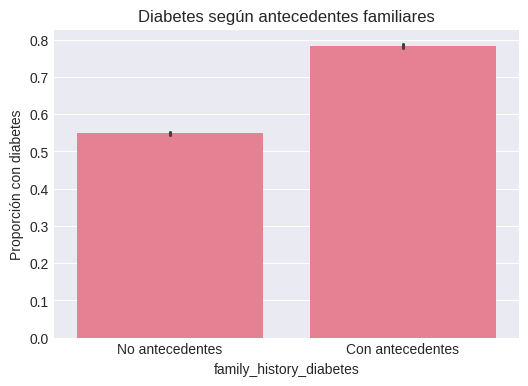

In [ ]:
pd.crosstab(
    df["family_history_diabetes"],
    df["y"],
    normalize="index"
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x="family_history_diabetes",
    y="y",
    estimator=lambda x: sum(x)/len(x)
)
plt.xticks([0,1], ["No antecedentes", "Con antecedentes"])
plt.ylabel("Proporción con diabetes")
plt.title("Diabetes según antecedentes familiares")
plt.show()

La presencia de antecedentes familiares de diabetes se asocia con una mayor proporción de individuos diagnosticados, confirmando su relevancia como factor de riesgo no modificable y su potencial valor predictivo dentro del modelo.

# MODELADO

Dejamos la función para ver las méricas de los modelos entrenados preparada:

In [ ]:
def saca_metricas(y1, y2):
    print('Matriz de Confusión')
    print(confusion_matrix(y1, y2))
    print('Accuracy:', accuracy_score(y1, y2))
    print('Precision:', precision_score(y1, y2))
    print('Recall:', recall_score(y1, y2))
    print('F1 Score:', f1_score(y1, y2))

    # Cálculo de la curva ROC y AUC
    false_positive_rate, recall, _ = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC:', roc_auc)

    # Crear gráfico interactivo con Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=false_positive_rate, y=recall, mode='lines', name='Curva ROC', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Línea base', line=dict(color='red', dash='dash')))

    fig.update_layout(
        title=f'Curva ROC (AUC = {roc_auc:.2f})',
        xaxis_title='False Positive Rate',
        yaxis_title='Recall',
        template='plotly_white'
    )

    fig.show()

El objetivo principal del modelo es identificar correctamente individuos con riesgo elevado de diabetes, priorizando la detección temprana frente a la simple maximización del acierto global. Dado el contexto de salud preventiva, los falsos negativos (personas en riesgo no detectadas) se consideran más costosos que los falsos positivos.

Por este motivo, la evaluación del modelo se basa en un conjunto de métricas complementarias que permiten analizar el rendimiento desde distintas perspectivas.

# Modelos base y limpieza de variables

In [ ]:
X = df
y = df['y']

Vamos a eliminar las variables que van a sobreajustar el modelo. Para ello, miramos tanto la correlación con la variable objetivo como el significado que tiene cada una:

In [ ]:
X = X.drop(["diabetes_stage", "diabetes_risk_score", "glucose_bin"], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [ ]:
label_encoders = {}

categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = X[col].astype(str) # Solo la columna actual
    X[col + "_encoded"] = le.fit_transform(X[col])

    # Guardamos el encoder para usarlo en test
    label_encoders[col] = le

In [ ]:
# seleccionamos las columnas de tipo object, excepto la target 'y'
cols_to_drop = [col for col in X.select_dtypes(include="object").columns if col != "y"]

# borramos esas columnas
X = X.drop(columns=cols_to_drop)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   alcohol_consumption_per_week        100000 non-null  int64  
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   sleep_hours_per_day                 100000 non-null  float64
 5   screen_time_hours_per_day           100000 non-null  float64
 6   family_history_diabetes             100000 non-null  int64  
 7   hypertension_history                100000 non-null  int64  
 8   cardiovascular_history              100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

Vemos la correlación

In [ ]:
# Copiamos solo columnas numéricas
df_num_total = X.select_dtypes(include=['int32','int64','float64']).copy()

# Calculamos correlación absoluta
corr = df_num_total.corr().abs()

# Ordenamos por correlación con la variable target
corr_target = corr[['y']].sort_values(by='y', ascending=False)
print(corr_target)

                                           y
y                                   1.000000
hba1c                               0.679397
glucose_postprandial                0.629832
glucose_fasting                     0.510919
family_history_diabetes             0.197926
age                                 0.137713
physical_activity_minutes_per_week  0.100774
bmi                                 0.097057
systolic_bp                         0.095481
waist_to_hip_ratio                  0.078918
ldl_cholesterol                     0.067475
cholesterol_total                   0.058173
insulin_level                       0.057715
triglycerides                       0.056230
hdl_cholesterol                     0.051227
diet_score                          0.044298
diastolic_bp                        0.035619
cardiovascular_history              0.029793
hypertension_history                0.027524
heart_rate                          0.022785
screen_time_hours_per_day           0.018127
gender_enc

In [ ]:
def plot_target_vs_features(var, target, df):
    proporcion = pd.DataFrame()
    proporcion['%'] = df[target].groupby(df[var]).mean() * 100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion = proporcion.round(3)
    proporcion_filtered = proporcion[(proporcion['%'] > 0) & (proporcion['Conteo'] > 10)]

    if len(proporcion_filtered) < 100 and len(proporcion_filtered) > 1:
        fig = px.bar(proporcion_filtered, x=proporcion_filtered.index, y='Conteo', title=f'Distribución de {var}', labels={'x': var, 'Conteo': 'Cantidad'}, template='plotly_white')
        fig.add_trace(go.Scatter(x=proporcion_filtered.index, y=proporcion_filtered['%'], mode='lines+markers', name='%', yaxis='y2', line=dict(color='green')))

        fig.update_layout(
            yaxis2=dict(title='%', overlaying='y', side='right')
        )
    elif len(proporcion_filtered) >= 100:
        df_filtered = df[[var, target]].dropna()
        df_filtered['bin'] = pd.qcut(df_filtered[var], q=20, duplicates='drop')
        bin_means = df_filtered.groupby('bin')[target].mean() * 100
        bin_counts = df_filtered.groupby('bin')[target].count()

        fig = go.Figure()
        fig.add_trace(go.Bar(x=bin_means.index.astype(str), y=bin_counts, name='Conteo', yaxis='y', marker_color='blue'))
        fig.add_trace(go.Scatter(x=bin_means.index.astype(str), y=bin_means, mode='lines+markers', name='%', yaxis='y2', line=dict(color='green')))

        fig.update_layout(
            title=f'Relación entre {var} y {target}',
            xaxis_title=f'Binned {var}',
            yaxis=dict(title='Conteo'),
            yaxis2=dict(title='%', overlaying='y', side='right'),
            template='plotly_white'
        )
    else:
        proporcion_filtered.reset_index(inplace=True)
        fig = px.scatter(proporcion_filtered, x=var, y='%', trendline='ols', title=f'Relación entre {var} y % Depósitos', template='plotly_white')

    fig.show()

In [ ]:
for i in X.columns:
    plot_target_vs_features (i, 'y', X)

El presente conjunto no cumple con los objetivos del producto que queremos desarrollar. Buscamos un acercamiento más accesible a un usuario, un test "fácil de responder". Hay variables clínicas que por un lado no estarían disponibles en un contexto de uso real orientado a usuarios finales, y por otro, constituyen una práctica clínica o un criterio diagnóstico de la diabetes. Es por ese motivo que debemos eliminarlas del modelo.

In [ ]:
X = X.drop(columns=['hba1c'], axis=1)

Haremos lo mismo con otras variables que, igualmente, sirven para un diagnóstico claro, no una prevención.

In [ ]:
X = X.drop(columns=['glucose_postprandial', 'insulin_level'], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   alcohol_consumption_per_week        100000 non-null  int64  
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   sleep_hours_per_day                 100000 non-null  float64
 5   screen_time_hours_per_day           100000 non-null  float64
 6   family_history_diabetes             100000 non-null  int64  
 7   hypertension_history                100000 non-null  int64  
 8   cardiovascular_history              100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

Entrenamos un modelo base para observar a continuación qué variables retirar teniendo en cuenta el fin último del proyecto (la construcción de un producto comprensible por un usuario que cuenta con la información clínica rutinaria).

Dado que la variable objetivo es binaria (diagnóstico de diabetes: sí/no), el problema se aborda como un problema de clasificación supervisada.

Este enfoque permite utilizar métricas clínicas relevantes como la sensibilidad, precisión y el área bajo la curva ROC, fundamentales en contextos de salud donde el coste de los falsos negativos es elevado.

Regresión logística

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop('y', axis=1), y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model_base_log = LogisticRegression()

model_base_log.fit(X_train,y_train)
y_pred = model_base_log.predict(X_test)

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[4456 3544]
 [2227 9773]]
Accuracy: 0.71145
Precision: 0.7338739956446647
Recall: 0.8144166666666667
F1 Score: 0.7720504009163803
AUC: 0.6857083333333334


Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop('y', axis=1), y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model_base = RandomForestClassifier(random_state=42, class_weight='balanced')

model_base.fit(X_train,y_train)
y_pred = model_base.predict(X_test)

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[4976 3024]
 [2516 9484]]
Accuracy: 0.723
Precision: 0.7582347297729453
Recall: 0.7903333333333333
F1 Score: 0.7739513628203035
AUC: 0.7061666666666666


Este modelo nos ha dado mejores métricas, de modo que continuaremos el proceso con RandomForest.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   alcohol_consumption_per_week        100000 non-null  int64  
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   sleep_hours_per_day                 100000 non-null  float64
 5   screen_time_hours_per_day           100000 non-null  float64
 6   family_history_diabetes             100000 non-null  int64  
 7   hypertension_history                100000 non-null  int64  
 8   cardiovascular_history              100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

In [ ]:
def plot_feature_importance(model_base, X_train):
    feat_importances = pd.DataFrame(model_base.feature_importances_, index=X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

    fig = px.bar(feat_importances, x=feat_importances.index, y='Importance', title='Feature Importances', labels={'x': 'Features', 'Importance': 'Importance'}, template='plotly_white')
    fig.show()

    return feat_importances

In [ ]:
plot_feature_importance(model_base, X_train)

,Importance
glucose_fasting,0.279978
physical_activity_minutes_per_week,0.050678
bmi,0.046265
triglycerides,0.045986
age,0.044647
screen_time_hours_per_day,0.044636
diet_score,0.043059
cholesterol_total,0.043035
sleep_hours_per_day,0.041226
systolic_bp,0.040607


Algunas variables con correlación moderada con la variable objetivo presentan una importancia cercana a cero en modelos basados en árboles. Esto se debe a que los modelos ensemble priorizan variables que aportan mayor ganancia de información condicional, y penalizan aquellas cuya señal ya está contenida en otras variables correlacionadas, especialmente variables binarias frente a continuas.

In [ ]:
# Correlación de cada feature con la variable objetivo
corr_with_y = X.corrwith(y)

# Ordenamos de mayor a menor
corr_sorted = corr_with_y.sort_values(ascending=False)

corr_sorted

,0
y,1.000000
glucose_fasting,0.510919
family_history_diabetes,0.197926
age,0.137713
bmi,0.097057
systolic_bp,0.095481
waist_to_hip_ratio,0.078918
ldl_cholesterol,0.067475
cholesterol_total,0.058173
triglycerides,0.056230


In [ ]:
corr_sorted_abs = corr_with_y.abs().sort_values(ascending=False)
corr_sorted_abs

,0
y,1.000000
glucose_fasting,0.510919
family_history_diabetes,0.197926
age,0.137713
physical_activity_minutes_per_week,0.100774
bmi,0.097057
systolic_bp,0.095481
waist_to_hip_ratio,0.078918
ldl_cholesterol,0.067475
cholesterol_total,0.058173


In [ ]:
lista = corr_sorted_abs.index
lista

Index(['y', 'glucose_fasting', 'family_history_diabetes', 'age',
       'physical_activity_minutes_per_week', 'bmi', 'systolic_bp',
       'waist_to_hip_ratio', 'ldl_cholesterol', 'cholesterol_total',
       'triglycerides', 'hdl_cholesterol', 'diet_score', 'diastolic_bp',
       'cardiovascular_history', 'hypertension_history', 'heart_rate',
       'screen_time_hours_per_day', 'gender_encoded', 'income_level_encoded',
       'education_level_encoded', 'ethnicity_encoded',
       'employment_status_encoded', 'alcohol_consumption_per_week',
       'smoking_status_encoded', 'sleep_hours_per_day'],
      dtype='object')

Hacemos una primera selección de variables y, para ello, elegiremos segun la importancia de las features y la correlación con la variable objetivo.

In [ ]:
list_pre_fe = [
    'glucose_fasting',
    'family_history_diabetes',
    'age',
    'physical_activity_minutes_per_week',
    'bmi',
    'systolic_bp',
    'waist_to_hip_ratio',
    'cholesterol_total',
    'triglycerides',
    'diet_score',
    'cardiovascular_history',
    'hypertension_history',
    'heart_rate',
    'screen_time_hours_per_day',
    'gender_encoded',
    'income_level_encoded',
    'education_level_encoded',
    'ethnicity_encoded',
    'employment_status_encoded',
    'alcohol_consumption_per_week',
    'smoking_status_encoded',
    'sleep_hours_per_day'
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop('y', axis=1), y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model_pre_fe = RandomForestClassifier(random_state=42, class_weight='balanced')

model_pre_fe.fit(X_train[list_pre_fe],y_train)
y_pred = model_pre_fe.predict(X_test[list_pre_fe])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[4951 3049]
 [2518 9482]]
Accuracy: 0.72165
Precision: 0.7566834251057377
Recall: 0.7901666666666667
F1 Score: 0.7730626554155966
AUC: 0.7045208333333335


In [ ]:
list_pre_fe_ldl = [
    'glucose_fasting',
    'family_history_diabetes',
    'age',
    'physical_activity_minutes_per_week',
    'bmi',
    'systolic_bp',
    'waist_to_hip_ratio',
    'ldl_cholesterol',
    'diet_score',
    'cardiovascular_history',
    'hypertension_history',
    'heart_rate',
    'screen_time_hours_per_day',
    'gender_encoded',
    'income_level_encoded',
    'education_level_encoded',
    'ethnicity_encoded',
    'employment_status_encoded',
    'alcohol_consumption_per_week',
    'smoking_status_encoded',
    'sleep_hours_per_day'
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop('y', axis=1), y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model_pre_fe_ldl = RandomForestClassifier(random_state=42, class_weight='balanced')

model_pre_fe_ldl.fit(X_train[list_pre_fe_ldl],y_train)
y_pred = model_pre_fe_ldl.predict(X_test[list_pre_fe_ldl])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[4937 3063]
 [2518 9482]]
Accuracy: 0.72095
Precision: 0.7558389796731766
Recall: 0.7901666666666667
F1 Score: 0.7726217152169484
AUC: 0.7036458333333333


In [ ]:
list_pre_fe_chol_total = [
    'glucose_fasting',
    'family_history_diabetes',
    'age',
    'physical_activity_minutes_per_week',
    'bmi',
    'systolic_bp',
    'waist_to_hip_ratio',
    'cholesterol_total',
    'diet_score',
    'cardiovascular_history',
    'hypertension_history',
    'heart_rate',
    'screen_time_hours_per_day',
    'gender_encoded',
    'income_level_encoded',
    'education_level_encoded',
    'ethnicity_encoded',
    'employment_status_encoded',
    'alcohol_consumption_per_week',
    'smoking_status_encoded',
    'sleep_hours_per_day'
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop('y', axis=1), y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model_pre_fe_chol_total = RandomForestClassifier()

model_pre_fe_chol_total.fit(X_train[list_pre_fe_chol_total],y_train)
y_pred = model_pre_fe_chol_total.predict(X_test[list_pre_fe_chol_total])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5090 2910]
 [2650 9350]]
Accuracy: 0.722
Precision: 0.7626427406199021
Recall: 0.7791666666666667
F1 Score: 0.7708161582852432
AUC: 0.7077083333333333


También podríamos eliminar aquellas del mismo grupo que puedan ser redundantes. Tras comprobar que el modelo con ldl nos da un resultado algo mejor, decidimos quedarnos con esta variable. Decidimos mantenerlas en el conjunto de variables total y hacer seleccióin de variables.

In [ ]:
#X = X.drop(columns=['hdl_cholesterol', 'cholesterol_total', 'triglycerides'], axis=1)

# Feature Engineering

In [ ]:
X = X.drop(columns=['y'], axis=1)

Con el objetivo de mejorar la interpretabilidad del modelo y alinear las variables con criterios clínicos y de salud pública, llevaremos a cabo un proceso de feature engineering para transformar variables continuas en indicadores binarios u ordinales. De esta manera podremos capturar umbrales relevantes desde el punto de vista médico (por ejemplo, recomendaciones de actividad física, rangos de glucosa o clasificación del IMC), facilitando tanto la explicación de los resultados como la generación de recomendaciones accionables para el usuario final. Estas transformaciones permiten capturar relaciones no lineales y mejorar la interpretabilidad del modelo sin introducir fuga de información.

In [ ]:
# Diet score
X['poor_diet'] = X['diet_score'].apply(lambda x: 1 if x<=4 else 0)
X['medium_diet'] = X['diet_score'].apply(lambda x: 1 if x>4 and x<=6 else 0)
X['healthy_diet'] = X['diet_score'].apply(lambda x: 1 if x>6 else 0)

# Sleep
X['non_optimal_sleep'] = (
    (X['sleep_hours_per_day'] < 6) |
    (X['sleep_hours_per_day'] > 8)
).astype(int)

# Physical activity
X['meets_pa_guidelines'] = (X['physical_activity_minutes_per_week'] >= 150).astype(int)
X['sedentary'] = (X['physical_activity_minutes_per_week'] < 150).astype(int)

# Screen time
X['screen_time_category'] = pd.cut(
    X['screen_time_hours_per_day'],
    bins=[0, 4, 7, 24],
    labels=[1, 2, 3]
).astype(int)
#leyenda Screen Time -> 1: 0-4; 2: 4-7; 3: 7-24

# Age groups
X['age_group'] = pd.cut(
    X['age'],
    bins=[0, 35, 50, 65, 100],
    labels=[1, 2, 3, 4]
).astype(int)
# leyenda age groups -> 1: 0-35; 2: 35-50; 3: 50-65; 4: +65

# BMI
X['obesity'] = (X['bmi'] >= 30).astype(int)
X['overweight_or_obese'] = (X['bmi'] >= 25).astype(int)

# Obesidad central
X['central_obesity'] = (X['waist_to_hip_ratio'] > 0.85).astype(int)

# Sendentarismo Digital (más de 6 horas al día pantallas + menos de 150  minutos de actividad fisica semanales)
X['high_screen_and_sedentary'] = (
    (X['screen_time_hours_per_day'] > 6) &
    (X['physical_activity_minutes_per_week'] < 150)
).astype(int)

# Glucose gasting groups
X['glucose_group'] = pd.cut(
    X['glucose_fasting'],
    bins=[0, 100, 126, 300],
    labels=[0, 1, 2]
).astype(int)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   age                                    100000 non-null  int64  
 1   alcohol_consumption_per_week           100000 non-null  int64  
 2   physical_activity_minutes_per_week     100000 non-null  int64  
 3   diet_score                             100000 non-null  float64
 4   sleep_hours_per_day                    100000 non-null  float64
 5   screen_time_hours_per_day              100000 non-null  float64
 6   family_history_diabetes                100000 non-null  int64  
 7   hypertension_history                   100000 non-null  int64  
 8   cardiovascular_history                 100000 non-null  int64  
 9   bmi                                    100000 non-null  float64
 10  waist_to_hip_ratio                     100000 non-null  f

In [ ]:
X.dtypes

,0
age,int64
alcohol_consumption_per_week,int64
physical_activity_minutes_per_week,int64
diet_score,float64
sleep_hours_per_day,float64
screen_time_hours_per_day,float64
family_history_diabetes,int64
hypertension_history,int64
cardiovascular_history,int64
bmi,float64


In [ ]:
list1 = [
    'glucose_fasting',
    'family_history_diabetes',
    'age',
    'physical_activity_minutes_per_week',
    'bmi',
    'systolic_bp',
    'waist_to_hip_ratio',
    'ldl_cholesterol',
    'diet_score',
    'cardiovascular_history',
    'hypertension_history',
    'heart_rate',
    'screen_time_hours_per_day',
    'gender_encoded',
    'income_level_encoded',
    'education_level_encoded',
    'ethnicity_encoded',
    'employment_status_encoded',
    'alcohol_consumption_per_week',
    'smoking_status_encoded',
    'sleep_hours_per_day',

    # feature engineering

    'poor_diet',
    'medium_diet', # elegiremos una de estas tres
    'healthy_diet',

    'non_optimal_sleep',

    #elegiremos una de estas dos
    'meets_pa_guidelines',
    'sedentary',

    'screen_time_category',

    'age_group',

    # elegiremos una de estas dos
    'obesity',
    'overweight_or_obese',

    'central_obesity',

    'high_screen_and_sedentary',

    'glucose_group'
]

MUESTREO ESTRATIFICADO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
model_all_fe = RandomForestClassifier(random_state=42, class_weight='balanced')

model_all_fe.fit(X_train[list1],y_train)
y_pred = model_all_fe.predict(X_test[list1])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[4832 3168]
 [2440 9560]]
Accuracy: 0.7196
Precision: 0.7510999371464487
Recall: 0.7966666666666666
F1 Score: 0.7732125525719832
AUC: 0.7003333333333333


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   alcohol_consumption_per_week        100000 non-null  int64  
 2   physical_activity_minutes_per_week  100000 non-null  int64  
 3   diet_score                          100000 non-null  float64
 4   sleep_hours_per_day                 100000 non-null  float64
 5   screen_time_hours_per_day           100000 non-null  float64
 6   family_history_diabetes             100000 non-null  int64  
 7   hypertension_history                100000 non-null  int64  
 8   cardiovascular_history              100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

Al usar todas las variables, las métricas de nuestro modelo han disminuido.

In [ ]:
lista1 = [
    'age_group',
    'ethnicity_encoded',
    'gender_encoded',
    'income_level_encoded',
    'employment_status_encoded',
    'glucose_fasting',
    'family_history_diabetes',
    'hypertension_history',
    'cardiovascular_history',
    'heart_rate',
    'alcohol_consumption_per_week',
    'overweight_or_obese',
    'meets_pa_guidelines',
    'high_screen_and_sedentary',
    'poor_diet',
    'healthy_diet',
    'central_obesity',
    'non_optimal_sleep'
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
model_lista1 = RandomForestClassifier(random_state=42, class_weight='balanced')

model_lista1.fit(X_train[lista1],y_train)
y_pred = model_lista1.predict(X_test[lista1])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5002 2998]
 [2672 9328]]
Accuracy: 0.7165
Precision: 0.7567742982313809
Recall: 0.7773333333333333
F1 Score: 0.7669160568938584
AUC: 0.7012916666666666


In [ ]:
lista1group = [
    'age_group',
    'ethnicity_encoded',
    'gender_encoded',
    'income_level_encoded',
    'employment_status_encoded',
    'glucose_fasting',
    'family_history_diabetes',
    'hypertension_history',
    'cardiovascular_history',
    'heart_rate',
    'alcohol_consumption_per_week',
    'overweight_or_obese',
    'meets_pa_guidelines',
    'high_screen_and_sedentary',
    'poor_diet',
    'healthy_diet',
    'central_obesity',
    'non_optimal_sleep',
    'glucose_group'
]

In [ ]:
model_lista1group = RandomForestClassifier(random_state=42, class_weight='balanced')

model_lista1group.fit(X_train[lista1group],y_train)
y_pred_group = model_lista1group.predict(X_test[lista1group])

In [ ]:
saca_metricas(y_test, y_pred_group)

Matriz de Confusión
[[4982 3018]
 [2621 9379]]
Accuracy: 0.71805
Precision: 0.75655400500121
Recall: 0.7815833333333333
F1 Score: 0.7688650243882444
AUC: 0.7021666666666667


La discretización de la glucosa en ayunas no reduce el rendimiento del modelo, ya que se pierde información continua relevante para la capacidad de discriminación (AUC). Por ello, se opta por mantener la variable continua, aceptando su peso dominante, coherente con la evidencia clínica.

In [ ]:
lista2 = [
    'age_group',
    'ethnicity_encoded',
    'gender_encoded',
    'income_level_encoded',
    'education_level_encoded',
    'employment_status_encoded',
    'glucose_fasting',
    'family_history_diabetes',
    'hypertension_history',
    'cardiovascular_history',
    'heart_rate',
    'alcohol_consumption_per_week',
    'overweight_or_obese',
    'meets_pa_guidelines',
    'high_screen_and_sedentary',
    'poor_diet',
    'healthy_diet',
    'non_optimal_sleep',
    'glucose_group'
]

In [ ]:
model_lista2 = RandomForestClassifier(random_state=42, class_weight='balanced')

model_lista2.fit(X_train[lista2],y_train)
y_pred = model_lista2.predict(X_test[lista2])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[4974 3026]
 [2610 9390]]
Accuracy: 0.7182
Precision: 0.7562822164948454
Recall: 0.7825
F1 Score: 0.7691677588466579
AUC: 0.7021250000000001


In [ ]:
lista3 = lista2 + [
    'smoking_status_encoded',
    'ldl_cholesterol'
]

In [ ]:
model_lista3 = RandomForestClassifier(random_state=42, class_weight='balanced')

model_lista3.fit(X_train[lista3],y_train)
y_pred = model_lista3.predict(X_test[lista3])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[4921 3079]
 [2510 9490]]
Accuracy: 0.72055
Precision: 0.7550322221338213
Recall: 0.7908333333333334
F1 Score: 0.7725182140095243
AUC: 0.7029791666666667


Interacciones y ratios para mejorar el modelo

In [ ]:
X['age_group*family_history_diabetes'] = X['age_group'] * X['family_history_diabetes']
X['overweight_or_obese*non_optimal_sleep'] = X['overweight_or_obese'] * X['non_optimal_sleep']

In [ ]:
lista4 = lista3 + [
    'age_group*family_history_diabetes',
    'overweight_or_obese*non_optimal_sleep',
    'physical_activity_minutes_per_week'
]

In [ ]:
lista5 = [x for x in lista4 if x not in ['glucose_fasting', 'glucose_group']]

In [ ]:
lista4

['age_group',
 'ethnicity_encoded',
 'gender_encoded',
 'income_level_encoded',
 'education_level_encoded',
 'employment_status_encoded',
 'glucose_fasting',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'heart_rate',
 'alcohol_consumption_per_week',
 'overweight_or_obese',
 'meets_pa_guidelines',
 'high_screen_and_sedentary',
 'poor_diet',
 'healthy_diet',
 'non_optimal_sleep',
 'glucose_group',
 'smoking_status_encoded',
 'ldl_cholesterol',
 'age_group*family_history_diabetes',
 'overweight_or_obese*non_optimal_sleep',
 'physical_activity_minutes_per_week']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
model_lista4 = RandomForestClassifier(random_state=42, class_weight='balanced')

model_lista4.fit(X_train[lista4],y_train)
y_pred = model_lista4.predict(X_test[lista4])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[4914 3086]
 [2497 9503]]
Accuracy: 0.72085
Precision: 0.7548653586464373
Recall: 0.7919166666666667
F1 Score: 0.7729472528366342
AUC: 0.7030833333333333


# MEJORA DE MODELO

## Tuneo de hiperparámetros

In [ ]:
#grid_param = {
    #'n_estimators': [50, 200, 300, 400, 500],
    #'max_depth': [20, 22,24]
#}

In [ ]:
# model_grid = GridSearchCV(estimator=model_lista4,
                     #param_grid=grid_param,
                     #scoring='recall',
                     #cv=5,
                     #n_jobs=-1)

In [ ]:
modelo5 = RandomForestClassifier(max_depth=22, n_estimators=400, random_state=42, class_weight='balanced').fit(X_train[lista4],y_train)
y_pred = modelo5.predict(X_test[lista4])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5152 2848]
 [2685 9315]]
Accuracy: 0.72335
Precision: 0.7658472416344652
Recall: 0.77625
F1 Score: 0.7710135330877789
AUC: 0.7101250000000001


In [ ]:
#rf = RandomForestClassifier(
    #random_state=42,
    #class_weight='balanced'
#)

#param_grid_rf = {
    #'n_estimators': [200, 400, 600],
    #'max_depth': [10, 15, 20, None],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 5, 10],
    #'max_features': ['sqrt', 'log2']
#}

#grid_rf = GridSearchCV(
    #estimator=rf,
    #param_grid=param_grid_rf,
    #scoring='recall',   # o 'roc_auc'
    #cv=5,
    #n_jobs=-1,
    #verbose=1
#)

#grid_rf.fit(X_train, y_train)

#print("Mejores parámetros RF:", grid_rf.best_params_)
#print("Mejor recall RF:", grid_rf.best_score_)

Se amplió el espacio de búsqueda de hiperparámetros para evitar soluciones subóptimas derivadas de un grid excesivamente restrictivo.

## XGBoost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

In [ ]:
#param_grid_xgb = {
    #'n_estimators': [200, 400],
    #'max_depth': [3, 5, 7],
    #'learning_rate': [0.01, 0.05, 0.1],
    #'subsample': [0.8, 1.0],
    #'colsample_bytree': [0.8, 1.0],
    #'reg_alpha': [0, 0.1, 1],
    #'reg_lambda': [1, 5, 10]
#}

In [ ]:
#grid_xgb = GridSearchCV(
    #estimator=xgb,
    #param_grid=param_grid_xgb,
    #scoring='roc_auc',   # muy defendible
    #cv=5,
    #n_jobs=-1,
    #verbose=1
#)

#grid_xgb.fit(X_train, y_train)

#print("Mejores parámetros XGB:", grid_xgb.best_params_)
#print("Mejor ROC-AUC XGB:", grid_xgb.best_score_)

In [ ]:
modelo6 = XGBClassifier(random_state=42, class_weight='balanced')
modelo6.fit(X_train[lista4], y_train)

y_pred = modelo6.predict(X_test[lista4])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5019 2981]
 [2597 9403]]
Accuracy: 0.7211
Precision: 0.7592861757105943
Recall: 0.7835833333333333
F1 Score: 0.77124343832021
AUC: 0.7054791666666667


## Balanceo de datos

In [ ]:
X_train = X_train[lista4]
X_test = X_test[lista4]

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42,sampling_strategy=0.9)


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 47998
Before OverSampling, counts of label '0': 32002 

After OverSampling, the shape of train_X: (91196, 24)
After OverSampling, the shape of train_y: (91196,) 

After OverSampling, counts of label '1': 47998
After OverSampling, counts of label '0': 43198


In [ ]:
modelo7 = RandomForestClassifier(random_state=42, class_weight='balanced').fit(X_train_res,y_train_res)
y_pred= modelo7.predict(X_test)

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5418 2582]
 [3054 8946]]
Accuracy: 0.7182
Precision: 0.7760235947258848
Recall: 0.7455
F1 Score: 0.7604556273376403
AUC: 0.7113750000000001


##LGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

modelo8 = LGBMClassifier(
    n_estimators=400,    # número de árboles
    learning_rate=0.05,  # tasa de aprendizaje
    max_depth=22,         # profundidad máxima de los árboles
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    modelo8,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print("ROC-AUC per fold:", scores)
print("Mean ROC-AUC:", scores.mean())
print("Std:", scores.std())

[LightGBM] [Info] Number of positive: 47998, number of negative: 32002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599975 -> initscore=0.405361
[LightGBM] [Info] Start training from score 0.405361
[LightGBM] [Info] Number of positive: 47998, number of negative: 32002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 40
[LightGBM] [Info] [b

Se aplicó una validación cruzada estratificada de 5 particiones (5-fold stratified cross-validation) con el objetivo de garantizar la robustez del modelo y reducir la dependencia del rendimiento respecto a una única división entrenamiento–prueba.
Con esto podemos decir que el modelo, con una media de aproximadamente 0.8067 es consistentemente bueno. Además, una desviación estándar de 0.0006 nos dice que es muy estable, de modo que no depende del split, no hay señales fuertes de overfitting y el modelo generaliza bien.

In [ ]:
modelo8.fit(X_train[lista4], y_train)
y_pred = modelo8.predict(X_test[lista4])

In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[5097 2903]
 [2579 9421]]
Accuracy: 0.7259
Precision: 0.7644433625446284
Recall: 0.7850833333333334
F1 Score: 0.7746258839006742
AUC: 0.7111041666666666


In [ ]:
modelo9 = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=22,
    random_state=42
)


modelo9.fit(X_train[lista5], y_train)
y_pred = modelo9.predict(X_test[lista5])

[LightGBM] [Info] Number of positive: 47998, number of negative: 32002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.599975 -> initscore=0.405361
[LightGBM] [Info] Start training from score 0.405361


In [ ]:
saca_metricas(y_test, y_pred)

Matriz de Confusión
[[2684 5316]
 [2150 9850]]
Accuracy: 0.6267
Precision: 0.649479097982329
Recall: 0.8208333333333333
F1 Score: 0.7251711698446588
AUC: 0.5781666666666667


Hasta el momento, el modelo 8 es el que mejores métricas nos ha proporcionado, de modo que es el elegido para comprobar el outcome que queremos para nuestra productivzación.

In [ ]:
y_proba = modelo8.predict_proba(X_test[lista4])[:, 1]

In [ ]:
y_proba

array([0.563341  , 0.88591444, 0.41052914, ..., 0.07953751, 0.99973487,
       0.21987139])

In [ ]:
def risk_category(prob):
    if prob < 0.30:
        return "Bajo riesgo"
    elif prob < 0.60:
        return "Riesgo moderado"
    else:
        return "Alto riesgo"

In [ ]:
risk_labels = [risk_category(p) for p in y_proba]

In [ ]:
usuario = X_test[lista4].iloc[[0]]

prob = modelo8.predict_proba(usuario)[0, 1]
categoria = risk_category(prob)

print(f"Probabilidad estimada de diabetes: {prob:.2%}")
print(f"Nivel de riesgo: {categoria}")

Probabilidad estimada de diabetes: 56.33%
Nivel de riesgo: Riesgo moderado


El modelo final devuelve una probabilidad asociada al riesgo de padecer diabetes, en lugar de una predicción binaria. Esta probabilidad se traduce posteriormente en niveles de riesgo (bajo, moderado y alto) con el objetivo de facilitar la interpretación por usuarios no expertos. Este enfoque parece más adecuado para un entorno de prevención y concienciación, donde el objetivo no es el diagnóstico clínico sino la identificación temprana de perfiles de riesgo.

# PIPELINE DE TRANSFORMACIONES

In [ ]:
pl = df.copy()
pl.shape

(100000, 32)

In [ ]:
pl = pl.drop(["diabetes_stage", "diabetes_risk_score", "hba1c"], axis=1)

In [ ]:
categorical_cols = pl.select_dtypes(include=['object']).columns

In [ ]:
for col in categorical_cols:
    le = label_encoders[col]

    pl[col] = pl[col].astype(str)
    pl[col] = pl[col].apply(lambda x: x if x in le.classes_ else "Unknown")
    if "Unknown" not in le.classes_:
        le.classes_ = np.append(le.classes_, "Unknown")

    pl[col + "_encoded"] = le.transform(pl[col])

In [ ]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   gender                              100000 non-null  object  
 2   ethnicity                           100000 non-null  object  
 3   education_level                     100000 non-null  object  
 4   income_level                        100000 non-null  object  
 5   employment_status                   100000 non-null  object  
 6   smoking_status                      100000 non-null  object  
 7   alcohol_consumption_per_week        100000 non-null  int64   
 8   physical_activity_minutes_per_week  100000 non-null  int64   
 9   diet_score                          100000 non-null  float64 
 10  sleep_hours_per_day                 100000 non-null  float64 
 11  screen_time_ho

In [ ]:
# columnas de tipo object, excepto la target 'y'
cols_to_drop = [col for col in pl.select_dtypes(include="object").columns if col != "y"]

# borramos esas columnas
pl = pl.drop(columns=cols_to_drop)

pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   alcohol_consumption_per_week        100000 non-null  int64   
 2   physical_activity_minutes_per_week  100000 non-null  int64   
 3   diet_score                          100000 non-null  float64 
 4   sleep_hours_per_day                 100000 non-null  float64 
 5   screen_time_hours_per_day           100000 non-null  float64 
 6   family_history_diabetes             100000 non-null  int64   
 7   hypertension_history                100000 non-null  int64   
 8   cardiovascular_history              100000 non-null  int64   
 9   bmi                                 100000 non-null  float64 
 10  waist_to_hip_ratio                  100000 non-null  float64 
 11  systolic_bp   

In [ ]:
# Diet score
pl['poor_diet'] = pl['diet_score'].apply(lambda x: 1 if x<=4 else 0)
pl['medium_diet'] = pl['diet_score'].apply(lambda x: 1 if x>4 and x<=6 else 0)
pl['healthy_diet'] = pl['diet_score'].apply(lambda x: 1 if x>6 else 0)

# Sleep
pl['non_optimal_sleep'] = (
    (pl['sleep_hours_per_day'] < 6) |
    (pl['sleep_hours_per_day'] > 8)
).astype(int)

# Physical activity
pl['meets_pa_guidelines'] = (pl['physical_activity_minutes_per_week'] >= 150).astype(int)
pl['sedentary'] = (pl['physical_activity_minutes_per_week'] < 150).astype(int)


# Screen time
pl['screen_time_category'] = pd.cut(
  pl['screen_time_hours_per_day'],
    bins=[0, 4, 7, 24],
    labels=[1, 2, 3]
).astype(int)
#leyenda Screen Time -> 1: 0-4; 2: 4-7; 3: 7-24

# Age groups
pl['age_group'] = pd.cut(
    pl['age'],
    bins=[0, 35, 50, 65, 100],
    labels=[1, 2, 3, 4]
).astype(int)
# leyenda age groups -> 1: 0-35; 2: 35-50; 3: 50-65; 4: +65


# BMI
pl['obesity'] = (pl['bmi'] >= 30).astype(int)
pl['overweight_or_obese'] = (pl['bmi'] >= 25).astype(int)

# Obesidad central
pl['central_obesity'] = (pl['waist_to_hip_ratio'] > 0.85).astype(int)

# Sendentarismo Digital (más de 6 horas al día pantallas + menos de 150  minutos de actividad fisica semanales)
pl['high_screen_and_sedentary'] = (
    (pl['screen_time_hours_per_day'] > 6) &
    (pl['physical_activity_minutes_per_week'] < 150)
).astype(int)

# Glucose gasting groups
pl['glucose_group'] = pd.cut(
    pl['glucose_fasting'],
    bins=[0, 100, 126, 300],
    labels=[0, 1, 2]
).astype(int)

 # Interacciones y ratios para mejorar el modelo
pl['age_group*family_history_diabetes'] = pl['age_group'] * pl['family_history_diabetes']
pl['overweight_or_obese*non_optimal_sleep'] = pl['overweight_or_obese'] * pl['non_optimal_sleep']

In [ ]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 44 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   age                                    100000 non-null  int64   
 1   alcohol_consumption_per_week           100000 non-null  int64   
 2   physical_activity_minutes_per_week     100000 non-null  int64   
 3   diet_score                             100000 non-null  float64 
 4   sleep_hours_per_day                    100000 non-null  float64 
 5   screen_time_hours_per_day              100000 non-null  float64 
 6   family_history_diabetes                100000 non-null  int64   
 7   hypertension_history                   100000 non-null  int64   
 8   cardiovascular_history                 100000 non-null  int64   
 9   bmi                                    100000 non-null  float64 
 10  waist_to_hip_ratio                     100000

In [ ]:
pl = pl.drop(columns=['y'], axis=1)

In [ ]:
pl.shape

(100000, 43)

In [ ]:
lista4

['age_group',
 'ethnicity_encoded',
 'gender_encoded',
 'income_level_encoded',
 'education_level_encoded',
 'employment_status_encoded',
 'glucose_fasting',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'heart_rate',
 'alcohol_consumption_per_week',
 'overweight_or_obese',
 'meets_pa_guidelines',
 'high_screen_and_sedentary',
 'poor_diet',
 'healthy_diet',
 'non_optimal_sleep',
 'glucose_group',
 'smoking_status_encoded',
 'ldl_cholesterol',
 'age_group*family_history_diabetes',
 'overweight_or_obese*non_optimal_sleep',
 'physical_activity_minutes_per_week']

In [ ]:
listapl1 = [
'age_group',
 'ethnicity_encoded',
 'gender_encoded',
 'income_level_encoded',
 'education_level_encoded',
 'employment_status_encoded',
 'glucose_fasting',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'heart_rate',
 'alcohol_consumption_per_week',
 'overweight_or_obese',
 'meets_pa_guidelines',
 'high_screen_and_sedentary',
 'poor_diet',
 'healthy_diet',
 'non_optimal_sleep',
 'glucose_group',
 'smoking_status_encoded',
 'ldl_cholesterol',
 'age_group*family_history_diabetes',
 'overweight_or_obese*non_optimal_sleep',
 'physical_activity_minutes_per_week'
]

In [ ]:
listapl2 = [
 'age_group',
 'ethnicity_encoded',
 'gender_encoded',
 'income_level_encoded',
 'education_level_encoded',
 'employment_status_encoded',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'heart_rate',
 'alcohol_consumption_per_week',
 'overweight_or_obese',
 'high_screen_and_sedentary',
 'poor_diet',
 'non_optimal_sleep',
 'smoking_status_encoded',
 'ldl_cholesterol',
 'age_group*family_history_diabetes',
 'overweight_or_obese*non_optimal_sleep',
 'alcohol/diet_score',
 'physical_activity_per_week/screen_time_hours',
 'physical_activity_minutes_per_week'
]

In [ ]:
pl_model = pl[listapl1].copy()

In [ ]:
FEATURES = pl_model.columns.tolist()

In [ ]:
# hacemos un check para ver que todo se ha procesado correctamente

missing_cols = set(listapl1) - set(pl.columns)
extra_cols = set(pl.columns) - set(listapl1)

print("Columnas que faltan:", missing_cols)
print("Columnas que sobran:", extra_cols)

Columnas que faltan: set()
Columnas que sobran: {'sedentary', 'age', 'sleep_hours_per_day', 'obesity', 'bmi', 'screen_time_hours_per_day', 'triglycerides', 'screen_time_category', 'diet_score', 'insulin_level', 'waist_to_hip_ratio', 'systolic_bp', 'medium_diet', 'glucose_postprandial', 'diastolic_bp', 'cholesterol_total', 'glucose_bin', 'hdl_cholesterol', 'central_obesity'}


In [ ]:
pl_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   age_group                              100000 non-null  int64
 1   ethnicity_encoded                      100000 non-null  int64
 2   gender_encoded                         100000 non-null  int64
 3   income_level_encoded                   100000 non-null  int64
 4   education_level_encoded                100000 non-null  int64
 5   employment_status_encoded              100000 non-null  int64
 6   glucose_fasting                        100000 non-null  int64
 7   family_history_diabetes                100000 non-null  int64
 8   hypertension_history                   100000 non-null  int64
 9   cardiovascular_history                 100000 non-null  int64
 10  heart_rate                             100000 non-null  int64
 11  alcohol_consum

# INTERPRETABILIDAD DEL MODELO

In [ ]:
!pip install shap
import shap

In [ ]:
explainer = shap.TreeExplainer(modelo8)
shap_values = explainer.shap_values(X_test[lista4])

In [ ]:
explainer2 = shap.TreeExplainer(modelo9)
shap_values2 = explainer2.shap_values(X_test[lista5])

In [ ]:
type(shap_values)

numpy.ndarray

In [ ]:
if isinstance(shap_values, list):
    print("Lista")
    for i, sv in enumerate(shap_values):
        print(i, sv.shape)
else:
    print("Array:", shap_values.shape)

Array: (20000, 24)


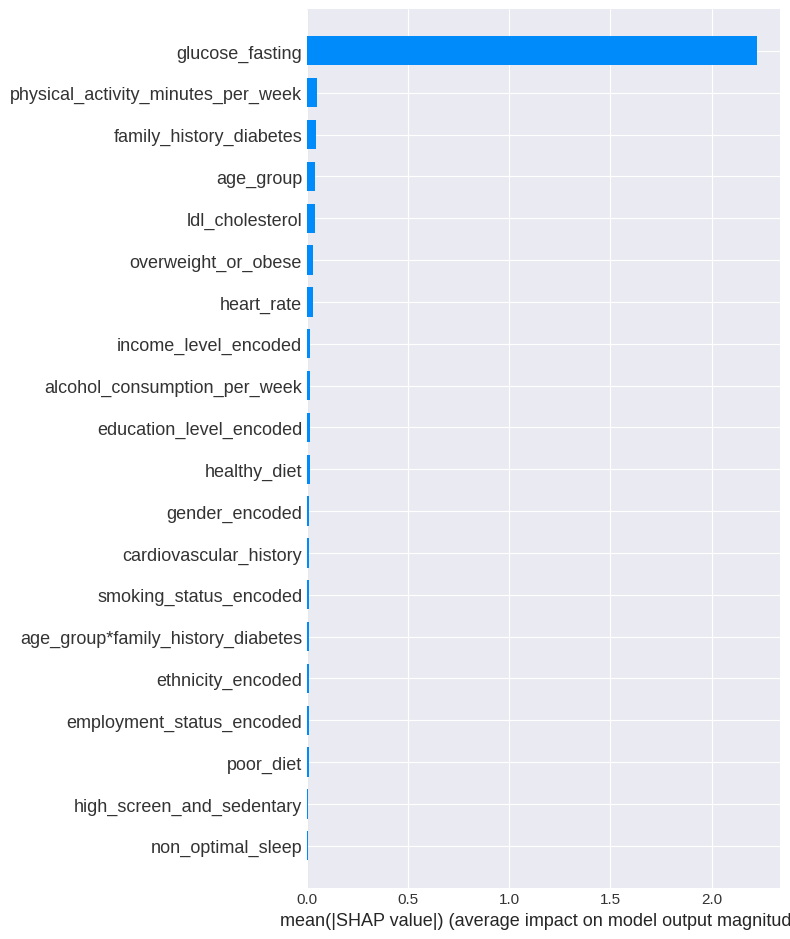

In [ ]:
shap_lista4_modelo8 = shap.summary_plot(
    shap_values,
    X_test[lista4],
    plot_type="bar"
)

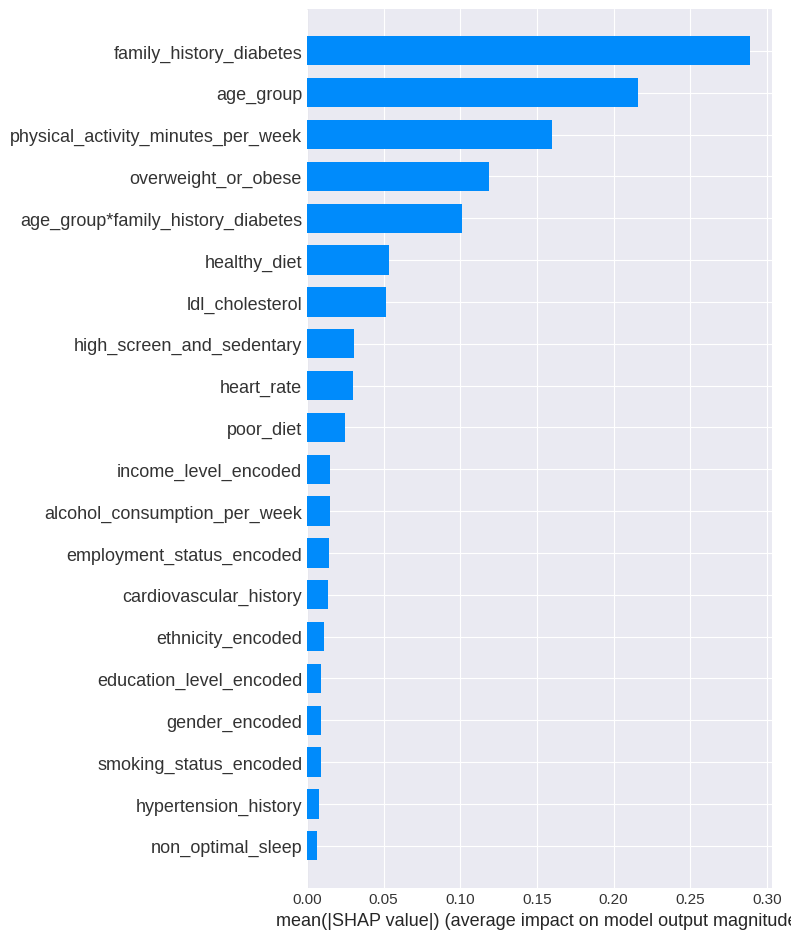

In [ ]:
shap_lista5_modelo9 = shap.summary_plot(
    shap_values2,
    X_test[lista5],
    plot_type="bar"
)

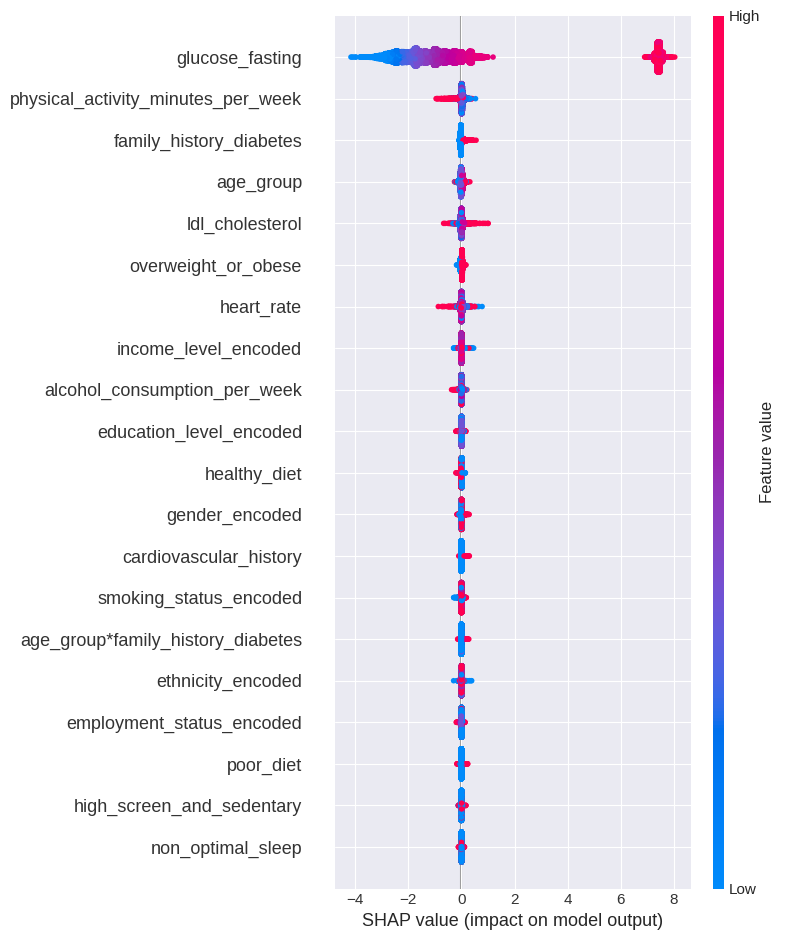

In [ ]:
shap.summary_plot(
    shap_values,
    X_test[lista4]
)

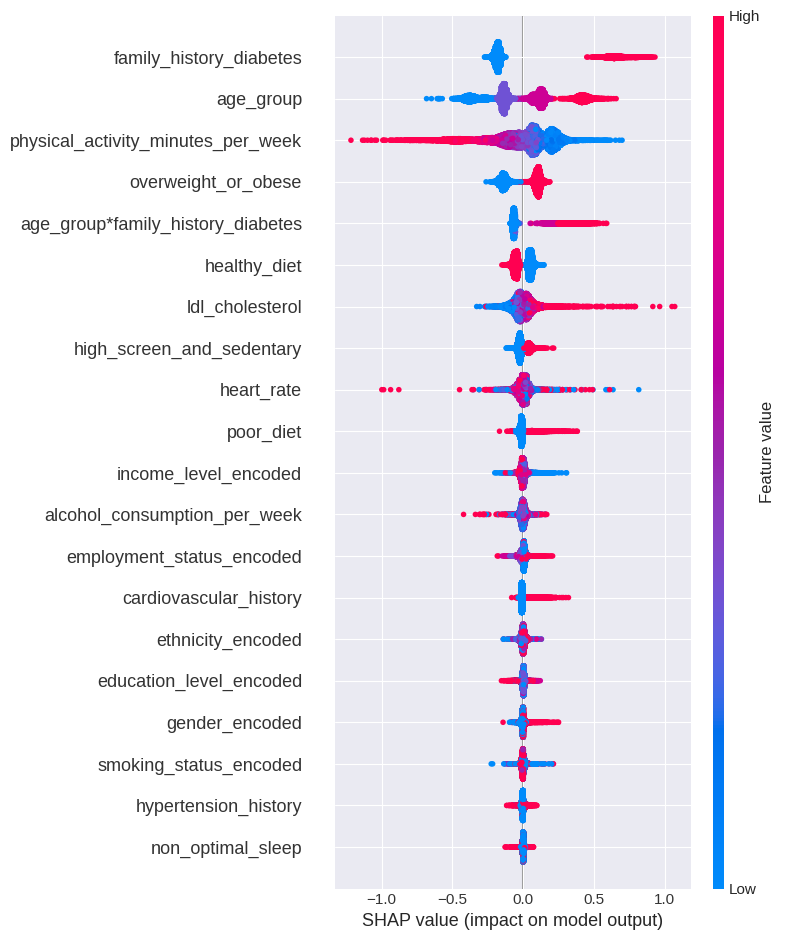

In [ ]:
shap.summary_plot(
    shap_values2,
    X_test[lista5]
)

# DOCUMENTOS PKL

In [ ]:
import pickle

pkl_filename = "modelo8.pkl"

# Modelo

with open(pkl_filename, 'wb') as file:
    pickle.dump(modelo8, file)

In [ ]:
modelo8

LGBMClassifier(learning_rate=0.05, max_depth=22, n_estimators=400,
               random_state=42)

In [ ]:
with open("encoders.pkl", 'wb') as file:
    pickle.dump(label_encoders, file)

In [ ]:
# Encoders
with open("encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

In [ ]:
with open("features.pkl", 'wb') as file:
    pickle.dump (FEATURES, file)

# PREPARACIONES PRODUCTIVIZACIÓN

In [ ]:
def prepare_input(user):
    """
    user: dict con inputs del usuario (valores naturales)
    devuelve: DataFrame con FEATURES listas para el modelo
    """

    # 1. DataFrame base

    pl = pd.DataFrame([user])


    # 2. Encoding categóricas

    for col, le in label_encoders.items():
        pl[col] = pl[col].astype(str)

        # gestionar valores desconocidos
        if "Unknown" not in le.classes_:
            le.classes_ = np.append(le.classes_, "Unknown")

        pl[col] = pl[col].apply(lambda x: x if x in le.classes_ else "Unknown")
        pl[col + "_encoded"] = le.transform(pl[col])

    # 3. Feature Engineering

    # Age groups
    pl["age_group"] = pd.cut(
        pl["age"],
        bins=[0, 35, 50, 65, 100],
        labels=[1, 2, 3, 4]
    ).astype(int)

    # Diet
    pl["poor_diet"] = (pl["diet_score"] <= 4).astype(int)

    # Sleep
    pl["non_optimal_sleep"] = (
        (pl["sleep_hours_per_day"] < 6) |
        (pl["sleep_hours_per_day"] > 8)
    ).astype(int)

    # BMI
    pl["overweight_or_obese"] = (pl["bmi"] >= 25).astype(int)

    # Obesidad central
    pl['central_obesity'] = (pl['waist_to_hip_ratio'] > 0.85).astype(int)

    # Sedentarismo digital
    pl["high_screen_and_sedentary"] = (
        (pl["screen_time_hours_per_day"] > 6) &
        (pl["physical_activity_minutes_per_week"] < 150)
    ).astype(int)

    # Glucosa
    pl["glucose_group"] = pd.cut(
        pl["glucose_fasting"],
        bins=[0, 100, 126, 300],
        labels=[0, 1, 2]
    ).astype(int)


    # 4. Interacciones

    pl["age_group*family_history_diabetes"] = (
        pl["age_group"] * pl["family_history_diabetes"]
    )

    pl["overweight_or_obese*non_optimal_sleep"] = (
        pl["overweight_or_obese"] * pl["non_optimal_sleep"]
    )


    # 5. Selección final

    X = pl.reindex(columns=FEATURES)

    return X

In [ ]:
user_input = {
    "age": 25,
    "gender": "Female",
    "ethnicity": "European",
    "income_level": "High",
    "education_level": "University",
    "employment_status": "Employed",
    "smoking_status": "Former",
    "family_history_diabetes": 1,
    "hypertension_history": 0,
    "cardiovascular_history": 0,
    "heart_rate": 87,
    "alcohol_consumption_per_week": 2,
    "diet_score": 8,
    "sleep_hours_per_day": 6.5,
    "bmi": 27,
    "waist_to_hip_ratio": 0.85,
    "screen_time_hours_per_day": 6,
    "physical_activity_minutes_per_week": 300,
    "ldl_cholesterol": 100,
    "glucose_fasting": 98
}

# input = prepare_input(user_input)
# risk = modelo8.predict_proba(input)[0, 1]

PIPELINE (PRODUCTO)

In [ ]:
def validate_input(user):
    errors = []

    if user["age"] <= 0 or user["age"] > 100:
        errors.append("Age must be between 1 and 100")

    if user["bmi"] < 15 or user["bmi"] > 60:
        errors.append("BMI value is out of plausible range")

    if user["glucose_fasting"] < 50 or user["glucose_fasting"] > 300:
        errors.append("Fasting glucose value is implausible")

    if user["sleep_hours_per_day"] < 0 or user["sleep_hours_per_day"] > 24:
        errors.append("Sleep hours must be between 0 and 24")

    if user["physical_activity_minutes_per_week"] < 0:
        errors.append("Physical activity cannot be negative")

    if user["screen_time_hours_per_day"] < 0 or user["screen_time_hours_per_day"] > 24:
        errors.append("Screen time must be between 0 and 24")

    if errors:
        raise ValueError(" | ".join(errors))

In [ ]:
def predict_risk(user_input):
    validate_input(user_input)
    X = prepare_input(user_input)
    prob = modelo8.predict_proba(X)[0,1]

    if prob < 0.30:
        level = "Low"
    elif prob < 0.60:
        level = "Medium"
    else:
        level = "High"


    return {
      "risk_level": level,
      "risk_probability": round(prob, 3)
  }

In [ ]:
def explain_prediction(X):
  explainer = shap.TreeExplainer(modelo8)
  shap_values = explainer.shap_values(X[listapl1])

  # Caso 1: shap_values es lista (multiclase)
  if isinstance(shap_values, list):
      # usamos la clase positiva (1)
      impacts = shap_values[1][0]
  else:

      # Caso 2: binario estándar
      impacts = shap_values[0]

  shap_df = pd.DataFrame({
      "feature": X.columns,
      "impact": impacts
  }).sort_values(by="impact", key=abs, ascending=False)

  return shap_df

In [ ]:
FEATURE_TO_DRIVER = {
    # Glucosa
    "glucose_fasting": "Blood sugar",
    "glucose_group": "Blood sugar",

    # Actividad física / sedentarismo
    "physical_activity_minutes_per_week": "Physical activity",
    "high_screen_and_sedentary": "Physical activity",
    "physical_activity_per_week/screen_time_hours": "Physical activity",

    # Sueño
    "non_optimal_sleep": "Sleep",

    # Peso
    "overweight_or_obese": "Body weight",
    "overweight_or_obese*non_optimal_sleep": "Body weight",
    "central_obesity": "Body weight",

    # Alimentación
    "poor_diet": "Diet",
    "healthy_diet": "Diet",
    "alcohol_consumption_per_week": "Diet",
    "alcohol/diet_score": "Diet",

    # Factores no modificables
    "family_history_diabetes": "Family history",
    "age_group*family_history_diabetes": "Family history",

    # Cardiovascular
    "hypertension_history": "Blood pressure",
    "ldl_cholesterol": "Cholesterol",
    "heart_rate": "Cardiovascular health",

    # Estilo de vida
    "smoking_status_encoded": "Smoking",

    # Demografía
    "gender_encoded": "Sex",
    "ethnicity_encoded": "Ethnicity",
}

In [ ]:
def aggregate_shap_by_driver(shap_df):
    shap_df = shap_df.copy()

    shap_df["driver"] = shap_df["feature"].map(FEATURE_TO_DRIVER)
    shap_df = shap_df.dropna(subset=["driver"])

    driver_df = (
        shap_df
        .groupby("driver", as_index=False)["impact"]
        .sum()
        .sort_values(by="impact", key=abs, ascending=False)
    )

    return driver_df

In [ ]:
def driver_to_user_message(driver, impact):
    direction = "increasing" if impact > 0 else "reducing"

    MESSAGES = {
        "Blood sugar": "Your blood sugar levels are {} your diabetes risk.",
        "Physical activity": "Your level of physical activity is {} your diabetes risk.",
        "Sleep": "Your sleep patterns are {} your diabetes risk.",
        "Body weight": "Your body weight is {} your diabetes risk.",
        "Diet": "Your diet is {} your diabetes risk.",
        "Family history": "Your family history is {} your diabetes risk.",
        "Blood pressure": "Your blood pressure is {} your diabetes risk.",
        "Cholesterol": "Your cholesterol levels are {} your diabetes risk.",
        "Smoking": "Smoking habits are {} your diabetes risk."
    }

    template = MESSAGES.get(driver, f"{driver} is {{}} your diabetes risk.")
    return template.format(direction)

In [ ]:
ACTIONABLE_RECOMMENDATIONS = {
    "Blood sugar": {
        "increase": [
            "Reduce intake of sugary drinks and refined carbohydrates.",
            "Try spacing meals evenly throughout the day to avoid glucose spikes.",
            "Consider checking fasting glucose regularly if advised by a professional."
        ],
        "reduce": [
            "Your blood sugar levels are currently well managed. Keep maintaining balanced meals."
        ]
    },

    "Physical activity": {
        "increase": [
            "Aim for at least 150 minutes of moderate physical activity per week.",
            "Include short walks after meals to improve glucose control.",
            "Try strength training 2 times per week to improve insulin sensitivity."
        ],
        "reduce": [
            "Your activity level is helping protect you. Try to keep this routine consistent."
        ]
    },

    "Sleep": {
        "increase": [
            "Try to maintain a consistent sleep schedule, even on weekends.",
            "Aim for 7–9 hours of sleep per night.",
            "Avoid screens at least 1 hour before bedtime."
        ],
        "reduce": [
            "Your sleep habits are supporting your metabolic health."
        ]
    },

    "Body weight": {
        "increase": [
            "Even a 5–7% reduction in body weight can significantly reduce diabetes risk.",
            "Focus on gradual changes rather than rapid weight loss.",
            "Pair nutrition changes with regular physical activity."
        ],
        "reduce": [
            "Your current weight is not increasing your diabetes risk."
        ]
    },

    "Diet": {
        "increase": [
            "Increase intake of vegetables, whole grains, and lean protein.",
            "Limit alcohol consumption to moderate levels.",
            "Try to reduce ultra-processed foods during the week."
        ],
        "reduce": [
            "Your dietary habits are helping lower your risk. Keep this pattern."
        ]
    },

    "Smoking": {
        "increase": [
            "Smoking is a known risk factor for diabetes and cardiovascular disease.",
            "If you smoke, consider seeking support to reduce or quit."
        ],
        "reduce": [
            "Not smoking is helping reduce your diabetes risk."
        ]
    },

    "Blood pressure": {
        "increase": [
            "Monitor blood pressure regularly if possible.",
            "Reduce salt intake and prioritize whole foods.",
            "Regular physical activity can help lower blood pressure."
        ],
        "reduce": [
            "Your blood pressure is not contributing significantly to your risk."
        ]
    },

    "Cholesterol": {
        "increase": [
            "Limit saturated fats and prioritize healthy fats like olive oil or nuts.",
            "Regular exercise can help improve cholesterol levels."
        ],
        "reduce": [
            "Your cholesterol levels are currently protective."
        ]
    },
    "Family history": {
    "increase": [
        "Family history is not something you can change, but healthy habits have an even greater protective effect in your case.",
        "Staying active and maintaining a balanced diet is especially important given your family background.",
        "Regular check-ups can help detect changes early."
    ],
    "reduce": [
        "Your family history plays on your side regarding to this matter! That is great news. However, do not forget that staying active and maintaining a balanced diet is still a key component of a healthy lifestyle."
    ]
}

}

In [ ]:
def generate_actionable_recommendations(driver_df, top_n=3):
    recommendations = []

    for _, row in driver_df.head(top_n).iterrows():
        driver = row["driver"]
        impact = row["impact"]
        direction = "increase" if impact > 0 else "reduce"

        recs = ACTIONABLE_RECOMMENDATIONS.get(driver, {}).get(direction, [])

        recommendations.append({
            "driver": driver,
            "impact_direction": direction,
            "recommendations": recs
        })

    return recommendations

In [ ]:
def predict_risk_with_explanation_and_action(user_input):
    validate_input(user_input)
    X = prepare_input(user_input)

    prob = modelo8.predict_proba(X)[0, 1]

    if prob < 0.30:
        level = "Low"
    elif prob < 0.60:
        level = "Medium"
    else:
        level = "High"

    shap_df = explain_prediction(X)
    driver_df = aggregate_shap_by_driver(shap_df)

    explanations = [
        driver_to_user_message(row["driver"], row["impact"])
        for _, row in driver_df.head(3).iterrows()
    ]

    actions = generate_actionable_recommendations(driver_df)

    return {
        "risk_level": level,
        "risk_probability": round(float(prob), 3),
        "key_drivers": explanations,
        "action_plan": actions
    }

In [ ]:
predict_risk_with_explanation_and_action(user_input)

{'risk_level': 'Medium',
 'risk_probability': 0.307,
 'key_drivers': ['Your blood sugar levels are reducing your diabetes risk.',
  'Your family history is increasing your diabetes risk.',
  'Your level of physical activity is reducing your diabetes risk.'],
 'action_plan': [{'driver': 'Blood sugar',
   'impact_direction': 'reduce',
   'recommendations': ['Your blood sugar levels are currently well managed. Keep maintaining balanced meals.']},
  {'driver': 'Family history',
   'impact_direction': 'increase',
   'recommendations': ['Family history is not something you can change, but healthy habits have an even greater protective effect in your case.',
    'Staying active and maintaining a balanced diet is especially important given your family background.',
    'Regular check-ups can help detect changes early.']},
  {'driver': 'Physical activity',
   'impact_direction': 'reduce',
   'recommendations': ['Your activity level is helping protect you. Try to keep this routine consistent.']}

# GRADIO

In [ ]:
!pip install gradio
import gradio as gr

In [ ]:
def gradio_predict(
    age, gender, ethnicity, income, education, employment,
    smoking, family_history, hypertension, cardiovascular,
    heart_rate, alcohol, diet_score, sleep_hours, bmi, waist_to_hip_ratio,
    screen_time, physical_activity, ldl, glucose
):

    user = {
        "age": age,
        "gender": gender,
        "ethnicity": ethnicity,
        "income_level": income,
        "education_level": education,
        "employment_status": employment,
        "smoking_status": smoking,
        "family_history_diabetes": family_history,
        "hypertension_history": hypertension,
        "cardiovascular_history": cardiovascular,
        "heart_rate": heart_rate,
        "alcohol_consumption_per_week": alcohol,
        "diet_score": diet_score,
        "sleep_hours_per_day": sleep_hours,
        "bmi": bmi,
        "waist_to_hip_ratio": waist_to_hip_ratio,
        "screen_time_hours_per_day": screen_time,
        "physical_activity_minutes_per_week": physical_activity,
        "ldl_cholesterol": ldl,
        "glucose_fasting": glucose
    }

    result = predict_risk_with_explanation_and_action(user)

    return (
        result["risk_level"],
        result["risk_probability"],
        result["key_drivers"],
        result["action_plan"]

    )

In [ ]:
app = gr.Interface(
    fn=gradio_predict,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(["Male", "Female", "Other"], label="Gender"),
        gr.Dropdown(["European", "African", "Asian", "Other"], label="Ethnicity"),
        gr.Dropdown(["Low", "Medium", "High"], label="Income level"),
        gr.Dropdown(["Primary", "Secondary", "University"], label="Education"),
        gr.Dropdown(["Employed", "Unemployed", "Retired"], label="Employment"),
        gr.Radio(["Never", "Former", "Smoker"], label="Smoking"),
        gr.Radio([0, 1], label="Family history of diabetes"),
        gr.Radio([0, 1], label="Family history of ypertension"),
        gr.Radio([0, 1], label="Family history of cardiovascular disease"),
        gr.Number(label="Heart rate"),
        gr.Number(label="Alcohol drinks per week"),
        gr.Slider(1, 10, label="Diet score"),
        gr.Number(label="Sleep hours/day"),
        gr.Number(label="BMI"),
        gr.Number(label="Screen time (hours/day)"),
        gr.Number(label="Physical activity (minutes/week)"),
        gr.Number(label="LDL cholesterol"),
        gr.Number(label="Fasting glucose")
    ],
    outputs=[
        gr.Label(label="Diabetes Risk Level"),
        gr.Number(label="Risk Probability"),
        gr.Label(label="Key Drivers"),
        gr.Textbox(label="Recommended next actions")

    ],
    title="Diabetes Risk Prediction",
    description="ML-based diabetes risk assessment"
)

app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2a2e7efc75cc443ff0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Con esto hemos desarrollado un sistema end-to-end que integra:

*   Feature engineering replicable
*   Modelo entrenado
*   Capa de decisión clínica
*   Interfaz de usuario funcional
*   Preparado para despliegue como API

# PREPARACIÓN DE STREAMLIT

In [ ]:
import os
os.listdir()

['.config',
 'modelo8.pkl',
 'drive',
 'encoders.pkl',
 'features.pkl',
 '.gradio',
 'sample_data']

In [ ]:
from google.colab import files
files.download("modelo8.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("encoders.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("features.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>